In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.api import SimpleExpSmoothing

In [316]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# How does GDP and Methane Emissions Impact Health Disorders Across the Globe?"

### Description
Mental health disorders are phenomena that increasingly affect individuals in countries across the world. Indeed, it is estimated that roughly 10.7% of individuals across the world suffer from a given mental disorder (Dattani and Ritchie, 2018). Mental health disorders come in various forms and levels of severity, which vary on an individual basis. Specifically, we are focusing on schizophrenia, bipolar disorder, anxiety disorder, drug use disorders, and depression – arguably, the most common mental health disorders. Equally as important, resources and counselign to combat said disorders are often limited or completely absent in certain regions of the world: a reality prompted by levels of political corruption, regime type, food security, and most importantly, GDP. As exemplified by Patricio V. Marquez and Emily Hewelett in their journal evaluating mental health and human capital development in OECD countries, " A growing body of evidence shows that the social and economic losses related to unattended mental conditions, including substance use disorders, are staggering. In the world’s most advanced economies – the 36 OECD countries – mental ill health affects an estimated 20 percent of the working-age population at any time, and its direct and indirect economic costs are estimated to account for about 3.5 percent of gross domestic product (GDP)," (Marquez and Hewelett, 2018).

As it relates to GDP, it is often believed that countries with a higher GDP tend to offer substantially more coounseling and mental health services – not to mention the quality of said services (Berkeley Economics, 2018). As such, the prevalence of mental health disorders should theoretically be lower than those countries where GDP is not high, but this need not be the case in every country with a high GDP.

Additionally, greenhouse gases tend to impact various sectors of a country's economy, thereby also affecting the livelihood of individuals. Specifically, we hope to dissect the effects of methane emissions on the pervasiveness of mental health disorders – a chain effect that begins with a country's inability to control these emissions, the prosperity of new businesses and infrastructure, and, consequently, the livelihood of its inhabitants. We believe methane is more appropiate for our analysis due to the fact it has a shorter residence time in the atmosphere compared to $CO^2$, and it is also the second most prevailing greenhouse gas (Somma, 2021). Further, methane traps more heat than carbon dioxide, thus dramatically impacting the ways individuals interact and their everyday lives. As a result, we can accurately gauge a country's more recent operations and their effect on overall mental health to determine a population's well-being. 

### We have three questions:
1) We are interested in seeing whether or not a country's GDP affects the rate of mental health disorders across the world.</p>
2) Simultaneously, climate change can have unintended consequences for the health of individuals. In particular, the emission of methane from coal mining, natural gas, and oil can have this effect. We would like to explore whether these emissions impact mental disorders in these regions. </p>
3) On par with our previous questions, we would also like to assess the relationship of both GDP and methane emissions on health disorders as these two features can drastically impact the health and well-being of individuals. 

<strong>Note:</strong> For all of our analyses, we will be focusing on 1992-2010.

### Hypotheses
We predict that a curtailment of a country's methane emissions can result in a positive impact on people's mental health. When viewing this from an economic perspective, in tandem with the provided commercial and GDP data, we can, in turn, accurately provide a feasible solution towards not only a state's exasperating climate change, but also a stronger outlet for mental health.</p>

1: A lower GDP is an indication of poor mental health resources, which means a higher prevalence of mental health disorders. That is, a higher rate across all of the disorders we are analyzing.</p>
2: A higher rate of methane emissions corresponds with higher rates of mental health disorders across the world.</p>
3: A higher rate of methane emissions and lower GDP result in higher rates of mental health disorders.</p>

### The data was pulled from two resources:

GDP dataset: https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016</p>
Methane: https://www.kaggle.com/datasets/kkhandekar/methane-emissions-across-the-world-19902018

In [144]:
mental = pd.read_excel("Mental health Depression disorder Data.xlsx")

In [3]:
mental.head(10)

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
5,Afghanistan,AFG,1995,0.160076,0.698695,0.090980,4.828337,1.728112,4.104207,0.668746
6,Afghanistan,AFG,1996,0.160249,0.698914,0.089709,4.828083,1.737643,4.107500,0.667727
7,Afghanistan,AFG,1997,0.160554,0.699127,0.088372,4.827726,1.746891,4.110834,0.666220
8,Afghanistan,AFG,1998,0.160931,0.699372,0.087330,4.826971,1.756963,4.114438,0.664676
9,Afghanistan,AFG,1999,0.161311,0.699674,0.086267,4.826413,1.770791,4.117633,0.663428


In [145]:
gdp = pd.read_csv("gdp-per-capita-maddison-2020.csv")

In [146]:
methane = pd.read_csv("methane_hist_emissions.csv")

In [6]:
methane.head(5)

,Country,Sector,Gas,Unit,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,China,Total including LUCF,CH4,MTCO2e,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,...,826.57,814.80,792.55,824.63,798.90,774.10,758.01,752.10,743.51,730.78
1,China,Total excluding LUCF,CH4,MTCO2e,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,...,825.69,813.83,791.73,823.86,798.45,773.65,757.56,751.66,743.07,730.34
2,Russia,Total including LUCF,CH4,MTCO2e,853.00,852.12,856.00,837.01,833.59,827.06,...,604.57,606.50,614.99,634.53,643.52,670.71,728.51,784.68,867.35,933.79
3,Russia,Total excluding LUCF,CH4,MTCO2e,849.57,850.17,852.55,835.56,830.22,825.64,...,598.70,597.72,610.38,622.22,639.73,666.92,724.72,780.89,863.52,929.97
4,China,Energy,CH4,MTCO2e,739.58,741.73,743.88,746.03,723.02,700.01,...,303.13,289.36,275.59,261.82,248.05,234.28,229.86,225.44,221.02,216.60


## Data Cleaning

For our first dataset, we are primarily only interested in the various mental health disorders highlighted in the dataframe and the respective countries. As such, we will leave this dataframe exactly as it is. As it pertains to our dataset containing our GDP information, the majority of the information in this dataset is not important to us, so we will only keep the information pertaining to GDP.

In [7]:
gdp.columns

Index(['Entity', 'Code', 'Year', 'GDP per capita', '417485-annotations'], dtype='object')

In [147]:
gdp = gdp[['Entity','Year','GDP per capita']]
x = list(range(1992,2011))
y=gdp.Year.isin(x)
gdp['new_dates']=y
gdp.drop(gdp[(gdp['new_dates']!=True)].index,inplace=True)
# gdp = gdp.drop_duplicates('year')
gdp.reset_index(inplace=True)

In [148]:
gdp=gdp.drop(['index','new_dates'],axis=1)

In [149]:
gdp.rename(columns={'GDP per capita':'gdp_per_capita'},inplace=True)

In [11]:
gdp.head()

,Entity,Year,gdp_per_capita
0,Afghanistan,1992,843.875305
1,Afghanistan,1993,578.402710
2,Afghanistan,1994,428.424591
3,Afghanistan,1995,632.940430
4,Afghanistan,1996,600.175293


In [150]:
a = list(range(1992,2011))
b=mental.Year.isin(a)
mental['new_dates']=b
mental.drop(mental[(mental['new_dates']!=True)].index,inplace=True)
mental.reset_index()
mental=mental.drop(['new_dates'],axis=1)
mental.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
5,Afghanistan,AFG,1995,0.160076,0.698695,0.090980,4.828337,1.728112,4.104207,0.668746
6,Afghanistan,AFG,1996,0.160249,0.698914,0.089709,4.828083,1.737643,4.107500,0.667727


In [151]:
methane = methane.drop(columns=['1990','1991','2011','2012','2013','2014','2015','2016','2017','2018'],axis=1)
methane.head()

,Country,Sector,Gas,Unit,2010,2009,2008,2007,2006,2005,...,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992
0,China,Total including LUCF,CH4,MTCO2e,1064.20,1019.28,974.42,921.86,883.58,837.94,...,824.52,830.59,826.57,814.80,792.55,824.63,798.90,774.10,758.01,752.10
1,China,Total excluding LUCF,CH4,MTCO2e,1063.83,1018.91,973.58,921.56,883.36,837.67,...,824.17,829.61,825.69,813.83,791.73,823.86,798.45,773.65,757.56,751.66
2,Russia,Total including LUCF,CH4,MTCO2e,804.22,776.75,798.54,792.59,783.56,767.29,...,643.60,623.67,604.57,606.50,614.99,634.53,643.52,670.71,728.51,784.68
3,Russia,Total excluding LUCF,CH4,MTCO2e,801.36,774.47,793.09,791.13,780.69,765.48,...,642.04,617.06,598.70,597.72,610.38,622.22,639.73,666.92,724.72,780.89
4,China,Energy,CH4,MTCO2e,593.65,552.07,510.49,468.91,427.33,385.75,...,330.67,316.90,303.13,289.36,275.59,261.82,248.05,234.28,229.86,225.44


We will now proceed to get rid of any Nan

In [152]:
mental.dropna(inplace=True)

In [153]:
methane.isnull().values.any()

False

In [154]:
methane.dropna(inplace=True)

In [155]:
gdp_countries = list(gdp.Entity.unique())
mental_countries = list(mental.Entity.unique())
methane_countries = list(methane.Country.unique())

countries = []

for x in gdp_countries:
    if x in mental_countries and x in methane_countries:
        countries.append(x)
len(countries)

156

In [156]:
gdp_to_drop = []
for x in gdp['Entity']:
    if x not in countries:
        gdp_to_drop.append(x)
gdp_to_drop = list(set(gdp_to_drop))

gdp = gdp[~gdp.Entity.str.contains('|'.join(gdp_to_drop))]

In [157]:
mental_to_drop = []
for x in mental['Entity']:
    if x not in countries:
        mental_to_drop.append(x)
mental_to_drop = list(set(mental_to_drop))

mental = mental[~mental.Entity.str.contains('|'.join(mental_to_drop))]

/Users/WeirdCesar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [158]:
methane_to_drop = []
for x in methane['Country']:
    if x not in countries:
        methane_to_drop.append(x)
methane_to_drop = list(set(methane_to_drop))

methane = methane[~methane.Country.str.contains('|'.join(methane_to_drop))]
methane.reset_index()

,index,Country,Sector,Gas,Unit,2010,2009,2008,2007,2006,...,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992
0,0,China,Total including LUCF,CH4,MTCO2e,1064.20,1019.28,974.42,921.86,883.58,...,824.52,830.59,826.57,814.80,792.55,824.63,798.90,774.10,758.01,752.10
1,1,China,Total excluding LUCF,CH4,MTCO2e,1063.83,1018.91,973.58,921.56,883.36,...,824.17,829.61,825.69,813.83,791.73,823.86,798.45,773.65,757.56,751.66
2,2,Russia,Total including LUCF,CH4,MTCO2e,804.22,776.75,798.54,792.59,783.56,...,643.60,623.67,604.57,606.50,614.99,634.53,643.52,670.71,728.51,784.68
3,3,Russia,Total excluding LUCF,CH4,MTCO2e,801.36,774.47,793.09,791.13,780.69,...,642.04,617.06,598.70,597.72,610.38,622.22,639.73,666.92,724.72,780.89
4,4,China,Energy,CH4,MTCO2e,593.65,552.07,510.49,468.91,427.33,...,330.67,316.90,303.13,289.36,275.59,261.82,248.05,234.28,229.86,225.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,1722,Uzbekistan,Land-Use Change and Forestry,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,...,0.00,0.04,0.02,0.03,0.03,0.03,0.03,0.03,0.03,0.03
1403,1728,Vietnam,Industrial Processes,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1404,1735,Yemen,Industrial Processes,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1405,1736,Yemen,Land-Use Change and Forestry,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [159]:
new_methane = pd.melt(methane, id_vars = ['Country'], value_vars=['1992','1993','1993',
                                                              '1994','1995','1996','1997','1998',
                                                             '1999','2000','2001','2002','2003','2004',
                                                             '2005','2006','2007','2008','2009','2010'])

In [160]:
new_methane = pd.DataFrame(new_methane)
new_methane['Country'] = new_methane['Country'].astype("string")
new_methane['variable'] = new_methane['variable'].astype("string")
new_methane = new_methane.rename({'value':'methane','variable': 'year'},axis=1)

In [141]:
new_methane.to_csv("methane1.csv")
gdp.to_csv("gdp1.csv")
mental.to_csv("mental1.csv")

## Visualizations

#### Mental Health Disorders
This visualization represents the various mental health disorders in our dataset. Specifically, we are seeing the relationship of certain disorders against others, noting the prevalence of certain disorders. Certain relationships become clear in the plot while others are not particularly relevant. One instance of this is eating disorders and anxiety, showing a strong positive relationship. This provides insight into our analyses as it allows us to observe which mental health disorders share some correlation with others. From this, we will be able to relate it to the coreesponding countries and see which disorders are more prevalent in each country. Using this information, we will cross-examine the data with countries' GDP and the amount of methane emissions they release. 

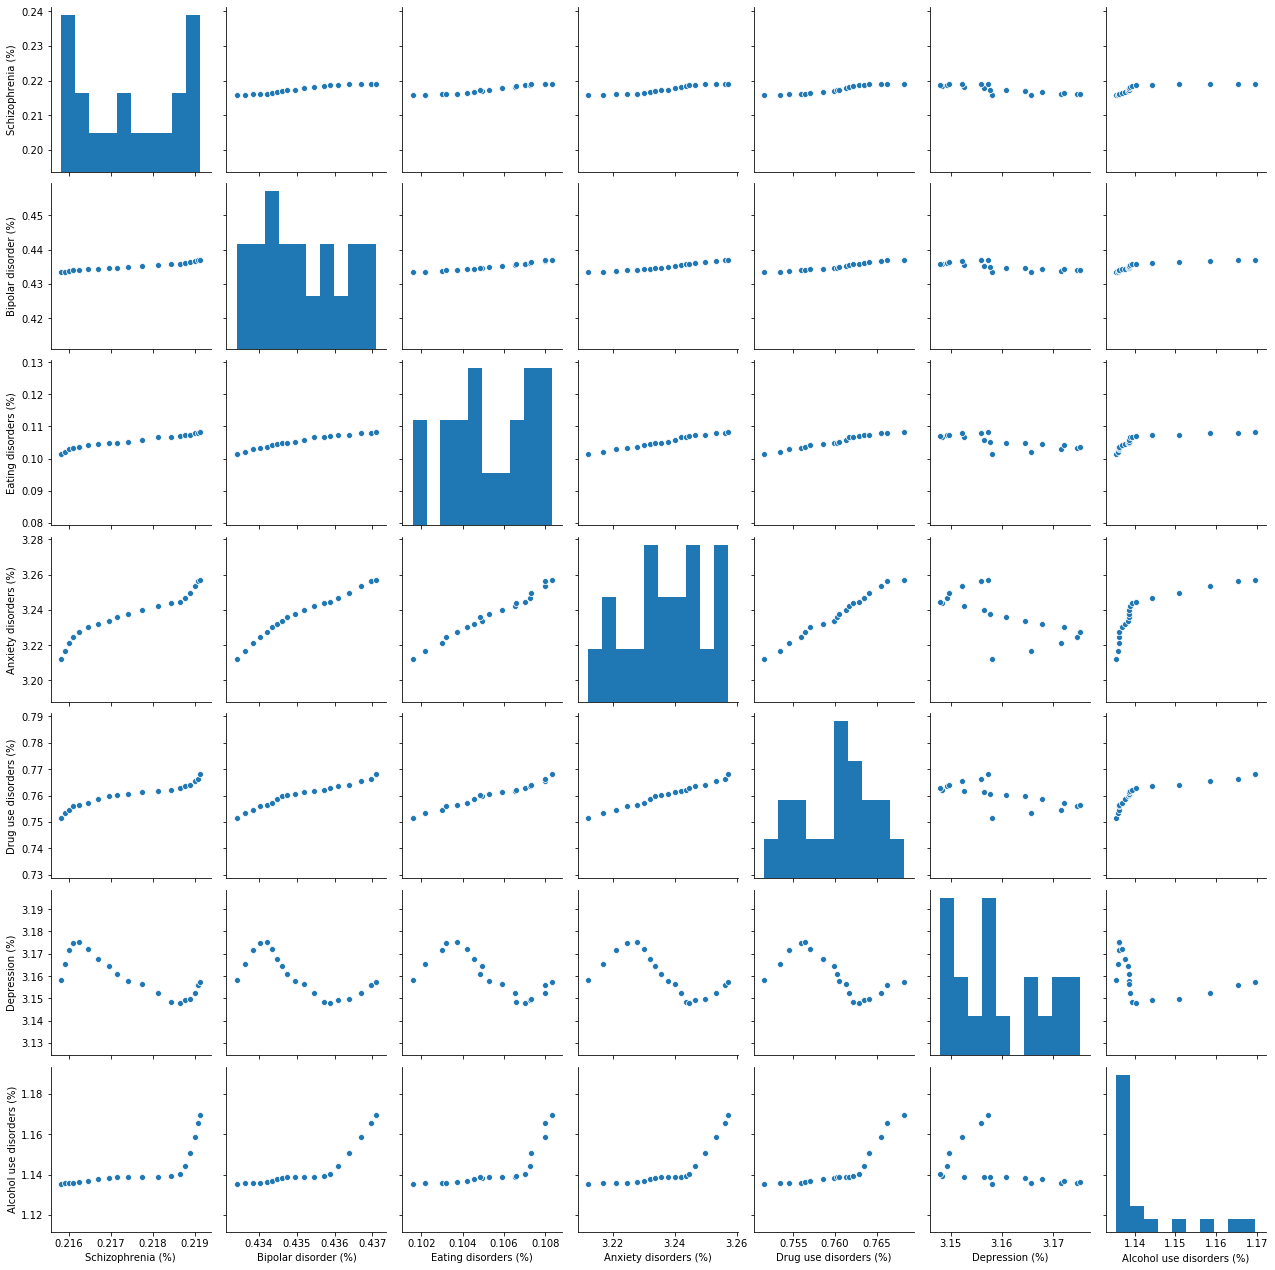

In [699]:
sns.pairplot(mental.iloc[:,3:])
plt.show()

#### GDP Per Year and Country
This plot shows the trend of GDP per year for all countries in our analyses. Our x-axis is somewhat cluttered due to the presence of various numbers with trailing decimals. However, the relationship is beyond evident, showing the countries with the highest GDP per year at the top of the y-xis and the ones with the lowest GDP at the bottom of the y-axis. This provides insight into our analyses as it allows us to observe which countries have the highest and lowest GDP per year, which can help us formulate our hypotheses about our prediction of mental health disorders. It can give us futher insight as to how the amount of people suffering from mental health disorders in the different countries in our dataset varies based on the differences in GDP per year. For example, countries like the United States may exhibit a large rate of individuals suffering from mental health disorders while also having a large GDP. Futhermore, we can also gain insight on the amount of methane emissions released by each country versus their GDP. For example, Brazil has a relatively low GDP but it is also one of the countries which release the most amount of methane emissions. 

In [138]:
plt.plot(gdp[' gdp_for_year ($) '], gdp['country'])
plt.tick_params(axis='y', which='major', pad=30)
plt.rcParams["figure.figsize"] = [40,20]
plt.xlabel('GDP')
plt.ylabel('country')
plt.show()

KeyError: ' gdp_for_year ($) '

#### Methane and Year by Country
This plot shows the methane emissions by country for the years 1992-2010. As can be seen, countries like Brazil and the United States emit a large amount of methane – as shown by the width of each country's shaded region. Countries like Kinbati and Seychelles emit the least methane – which appear towards the bottom of our plot. Although there are other high methane emitters like China, they are not part of analyses due to the availability of its data. This provides insight into our analyses as it allows us to observe which countries emit the most methane, which helps us formulate our hypotheses about our prediction of mental health disorders. For example, countries like the U.S. may exhibit a large rate of individuals suffering from mental health disorders while also emitting large amounts of methane.

In [14]:
sns.lineplot(data=new_methane, x="year", y="methane", hue="Country")
plt.xlabel('Year',fontsize=20)
plt.ylabel("Methane Content",fontsize=20)

NameError: name 'new_methane' is not defined

In [ ]:
len(mental)

In [ ]:
len(gdp)

In [ ]:
len(methane)

In [185]:
gdp = gdp.drop_duplicates(subset=[' gdp_for_year ($) '])

KeyError: Index([' gdp_for_year ($) '], dtype='object')

In [82]:
gdp.head(20)

,Entity,Year,gdp_per_capita
0,Afghanistan,1992,843.875305
1,Afghanistan,1993,578.402710
2,Afghanistan,1994,428.424591
3,Afghanistan,1995,632.940430
4,Afghanistan,1996,600.175293
5,Afghanistan,1997,570.598083
6,Afghanistan,1998,545.038818
7,Afghanistan,1999,518.657898
8,Afghanistan,2000,502.372711
9,Afghanistan,2001,489.682007


In [167]:
len(methane['Country'].unique())

156

In [168]:
len(mental['Entity'].unique())

156

In [169]:
len(gdp['Entity'].unique())

156

In [170]:
mental['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvi

In [171]:
mental = mental[mental['Entity']!='Micronesia (country)']

In [172]:
methane['Country'].unique()

array(['China', 'Russia', 'India', 'United States', 'World', 'Brazil',
       'Indonesia', 'Pakistan', 'Iran', 'Mexico', 'Australia', 'Nigeria',
       'Argentina', 'Uzbekistan', 'Ethiopia', 'Canada', 'Vietnam',
       'Thailand', 'Bangladesh', 'Afghanistan', 'Colombia', 'Venezuela',
       'Myanmar', 'Philippines', 'Tanzania', 'Ukraine', 'France', 'Egypt',
       'Chad', 'Germany', 'United Arab Emirates', 'United Kingdom',
       'Turkmenistan', 'Algeria', 'Malaysia', 'Poland', 'Turkey',
       'South Africa', 'Saudi Arabia', 'Italy', 'Azerbaijan',
       'Kazakhstan', 'Kenya', 'Angola', 'Spain', 'Libya', 'Uganda',
       'New Zealand', 'Central African Republic', 'Peru', 'Nepal',
       'Niger', 'Paraguay', 'Mozambique', 'Zambia', 'Bolivia',
       'South Korea', 'Romania', 'Mali', 'Cambodia', 'Ghana', 'Japan',
       'Uruguay', 'Ecuador', 'North Korea', 'Guinea', 'Mongolia',
       'Madagascar', 'Morocco', 'Netherlands', 'Ireland', 'Belarus',
       'Iraq', 'Burkina Faso', 'Cameroon

In [163]:
methane = methane[methane['Country']!='European Union (27)']

In [164]:
len(gdp['Entity'].unique())

156

In [165]:
gdp['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvi

In [166]:
mental['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvi

In [18]:
methane['Country'].unique()

methane['Country'].sort_values().unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Cook Islands',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-

In [19]:
len(gdp['Entity'])

3228

In [20]:
len(mental['Entity'])

4370

In [174]:
cc = list(gdp['Entity'].unique())
dd= list(mental['Entity'].unique())

In [175]:
for x in dd:
    if(x not in cc):
        print(x)

In [176]:
len(mental['Entity'].unique())

156

In [177]:
len(mental)

2964

In [178]:
len(gdp)

2946

In [179]:
mental.head(-1)

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
5,Afghanistan,AFG,1995,0.160076,0.698695,0.090980,4.828337,1.728112,4.104207,0.668746
6,Afghanistan,AFG,1996,0.160249,0.698914,0.089709,4.828083,1.737643,4.107500,0.667727
...,...,...,...,...,...,...,...,...,...,...
6455,Zimbabwe,ZWE,2005,0.159742,0.606630,0.129970,3.086927,0.716474,3.102648,1.480095
6456,Zimbabwe,ZWE,2006,0.158873,0.606588,0.126681,3.085964,0.720239,3.104970,1.483598
6457,Zimbabwe,ZWE,2007,0.157715,0.606590,0.123463,3.084816,0.729464,3.104822,1.492068
6458,Zimbabwe,ZWE,2008,0.156553,0.606656,0.119728,3.083928,0.739987,3.103491,1.502307


In [27]:
len(mental)

4370

In [28]:
len(gdp)

3228

In [29]:
len(methane)

1729

In [30]:
len(gdp['Entity'].unique())

178

In [31]:
len(mental['Entity'].unique())

230

In [32]:
methane1=methane.T

In [180]:
methane1=methane1.reset_index()

In [181]:
methane1 = methane1.T

In [182]:
len(methane1)

24

In [183]:
Y = mental['Schizophrenia (%)']
X = gdp['gdp_per_capita']
X = sm.add_constant(X)

In [184]:
model = sm.OLS(Y,X)

ValueError: The indices for endog and exog are not aligned

In [38]:
len(Y)

4370

In [39]:
len(X)

3228

In [40]:
len(mental)

4370

In [186]:
mental =mental.reset_index()

In [187]:
mental = mental.drop(columns='index')

In [188]:
d = []
for x in gdp['Entity']:
    d.append(x)

In [189]:
dd = np.array(d)

In [190]:
(unique,counts) = np.unique(dd,return_counts=True)
frequency = np.asarray((unique,counts)).T

In [191]:
frequency

array([['Afghanistan', '19'],
       ['Albania', '19'],
       ['Algeria', '19'],
       ['Angola', '19'],
       ['Argentina', '19'],
       ['Armenia', '19'],
       ['Australia', '19'],
       ['Austria', '19'],
       ['Azerbaijan', '19'],
       ['Bahrain', '19'],
       ['Bangladesh', '19'],
       ['Barbados', '19'],
       ['Belarus', '19'],
       ['Belgium', '19'],
       ['Benin', '19'],
       ['Bolivia', '19'],
       ['Bosnia and Herzegovina', '19'],
       ['Botswana', '19'],
       ['Brazil', '19'],
       ['Bulgaria', '19'],
       ['Burkina Faso', '19'],
       ['Burundi', '19'],
       ['Cambodia', '19'],
       ['Cameroon', '19'],
       ['Canada', '19'],
       ['Cape Verde', '19'],
       ['Central African Republic', '19'],
       ['Chad', '19'],
       ['Chile', '19'],
       ['China', '19'],
       ['Colombia', '19'],
       ['Comoros', '19'],
       ['Costa Rica', '19'],
       ['Croatia', '19'],
       ['Cuba', '19'],
       ['Cyprus', '19'],
       ['Denmark'

In [192]:
s = []
for x in mental['Entity']:
    s.append(x)

In [193]:
ss = np.array(s)

In [194]:
(unique,counts) = np.unique(ss,return_counts=True)
frequency = np.asarray((unique,counts)).T

In [195]:
#united arab emirates and world|

In [196]:
mental = mental[mental['Entity']!='United Arab Emirates']

In [197]:
gdp = gdp[gdp['Entity']!='United Arab Emirates']

In [198]:
mental = mental[mental['Entity']!='World']

In [199]:
gdp = gdp[gdp['Entity']!='World']

In [200]:
len(mental)

2926

In [201]:
len(gdp)

2926

In [202]:
methane = methane[methane['Country']!='United Arab Emirates']

In [203]:
methane = methane[methane['Country']!='World']

In [204]:
len(methane)

1386

In [205]:
rr=[]
for x in methane['Country']:
    rr.append(x)

In [206]:
ff = np.array(rr)

In [207]:
(unique,counts) = np.unique(ff,return_counts=True)
frequency = np.asarray((unique,counts)).T

In [208]:
mental = mental.reset_index()

In [209]:
mental = mental.drop(columns='index')

In [210]:
gdp = gdp.reset_index()

In [211]:
gdp = gdp.drop(columns='index')

In [212]:
Y = mental['Schizophrenia (%)']
X = gdp['gdp_per_capita']
X = sm.add_constant(X)

In [213]:
model = sm.OLS(Y,X).fit()

In [214]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Schizophrenia (%)   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     2145.
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        13:35:16   Log-Likelihood:                 5823.0
No. Observations:                2926   AIC:                        -1.164e+04
Df Residuals:                    2924   BIC:                        -1.163e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1809      0.001    219.987      0.000       0.179       0.183
gdp_per_capita  2.055e-06   4.44e-08     46.314      0.000    1.97e-06    2.14e-06
==============================================================================
Omnibus:                      589.216   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4032.122
Skew:                           0.777   Prob(JB):                         0.00
Kurtosis:                       8.537   Cond. No.                     2.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [223]:
sch_resid = model.resid

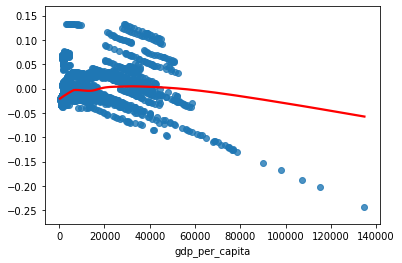

In [224]:
sns.regplot(gdp['gdp_per_capita'],sch_resid ,lowess=True,line_kws={'color':'red'})

In [225]:
Y = mental['Bipolar disorder (%)']
X = gdp['gdp_per_capita']
X = sm.add_constant(X)

In [226]:
model_bp = sm.OLS(Y,X).fit()

In [227]:
model_bp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Bipolar disorder (%)   R-squared:                       0.281
Model:                              OLS   Adj. R-squared:                  0.281
Method:                   Least Squares   F-statistic:                     1145.
Date:                  Sat, 07 May 2022   Prob (F-statistic):          3.71e-212
Time:                          14:06:48   Log-Likelihood:                 1833.4
No. Observations:                  2926   AIC:                            -3663.
Df Residuals:                      2924   BIC:                            -3651.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6622      0.003    205.978      0.000       0.656       0.669
gdp_per_capita  5.871e-06   1.73e-07     33.844      0.000    5.53e-06    6.21e-06
==============================================================================
Omnibus:                       87.211   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.496
Skew:                           0.209   Prob(JB):                     2.58e-37
Kurtosis:                       4.099   Cond. No.                     2.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [228]:
bipo_resid = model_bp.resid

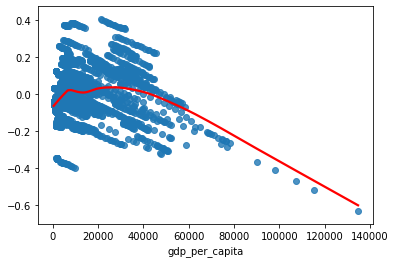

In [229]:
sns.regplot(gdp['gdp_per_capita'],bipo_resid ,lowess=True,line_kws={'color':'red'})

In [230]:
Y = mental['Eating disorders (%)']
X = gdp['gdp_per_capita']
X = sm.add_constant(X)

In [231]:
model_ed = sm.OLS(Y,X).fit()

In [232]:
model_ed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Eating disorders (%)   R-squared:                       0.665
Model:                              OLS   Adj. R-squared:                  0.665
Method:                   Least Squares   F-statistic:                     5810.
Date:                  Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                          14:06:49   Log-Likelihood:                 2882.9
No. Observations:                  2926   AIC:                            -5762.
Df Residuals:                      2924   BIC:                            -5750.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1192      0.002     53.092      0.000       0.115       0.124
gdp_per_capita  9.238e-06   1.21e-07     76.226      0.000       9e-06    9.48e-06
==============================================================================
Omnibus:                      934.969   Durbin-Watson:                   0.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33280.955
Skew:                          -0.840   Prob(JB):                         0.00
Kurtosis:                      19.437   Cond. No.                     2.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [233]:
eat_res = model_ed.resid

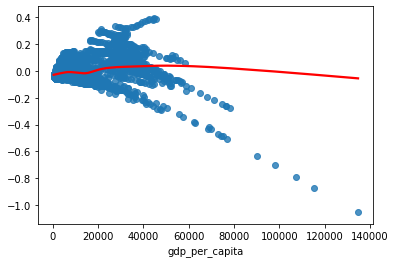

In [234]:
sns.regplot(gdp['gdp_per_capita'],eat_res ,lowess=True,line_kws={'color':'red'})

In [235]:
Y = mental['Anxiety disorders (%)']
X = gdp['gdp_per_capita']
X = sm.add_constant(X)

In [236]:
model_anxd = sm.OLS(Y,X).fit()

In [237]:
model_anxd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Anxiety disorders (%)   R-squared:                       0.312
Model:                               OLS   Adj. R-squared:                  0.312
Method:                    Least Squares   F-statistic:                     1326.
Date:                   Sat, 07 May 2022   Prob (F-statistic):          8.90e-240
Time:                           14:06:50   Log-Likelihood:                -4201.5
No. Observations:                   2926   AIC:                             8407.
Df Residuals:                       2924   BIC:                             8419.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.3582      0.025    132.796      0.000       3.309       3.408
gdp_per_capita  4.969e-05   1.36e-06     36.417      0.000     4.7e-05    5.24e-05
==============================================================================
Omnibus:                      347.040   Durbin-Watson:                   0.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.206
Skew:                           0.764   Prob(JB):                    1.95e-143
Kurtosis:                       4.749   Cond. No.                     2.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [238]:
anxiety_resid = model_anxd.resid

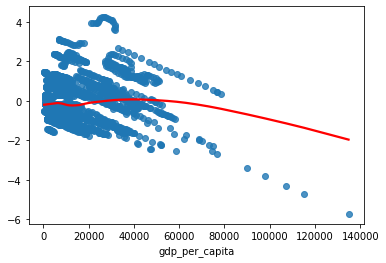

In [239]:
sns.regplot(gdp['gdp_per_capita'],anxiety_resid,lowess=True,line_kws={'color':'red'})

In [240]:
Y = mental['Drug use disorders (%)']
X = gdp['gdp_per_capita']
X = sm.add_constant(X)

In [241]:
model_drug = sm.OLS(Y,X).fit()

In [242]:
model_drug.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Drug use disorders (%)   R-squared:                       0.224
Model:                                OLS   Adj. R-squared:                  0.223
Method:                     Least Squares   F-statistic:                     841.7
Date:                    Sat, 07 May 2022   Prob (F-statistic):          7.33e-163
Time:                            14:06:51   Log-Likelihood:                -1420.2
No. Observations:                    2926   AIC:                             2844.
Df Residuals:                        2924   BIC:                             2856.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6381      0.010     65.285      0.000       0.619       0.657
gdp_per_capita   1.53e-05   5.27e-07     29.012      0.000    1.43e-05    1.63e-05
==============================================================================
Omnibus:                      996.766   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2909.270
Skew:                           1.791   Prob(JB):                         0.00
Kurtosis:                       6.320   Cond. No.                     2.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [243]:
drug_resid = model_drug.resid

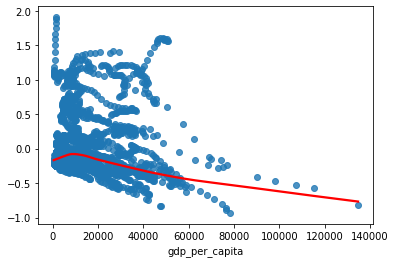

In [244]:
sns.regplot(gdp['gdp_per_capita'],drug_resid,lowess=True,line_kws={'color':'red'})

In [245]:
Y = mental['Depression (%)']
X = gdp['gdp_per_capita']
X = sm.add_constant(X)

In [246]:
model_depression = sm.OLS(Y,X).fit()

In [247]:
model_depression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Depression (%)   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     151.1
Date:                Sat, 07 May 2022   Prob (F-statistic):           6.63e-34
Time:                        14:06:52   Log-Likelihood:                -2877.1
No. Observations:                2926   AIC:                             5758.
Df Residuals:                    2924   BIC:                             5770.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.3915      0.016    210.892      0.000       3.360       3.423
gdp_per_capita  1.067e-05   8.68e-07     12.294      0.000    8.97e-06    1.24e-05
==============================================================================
Omnibus:                      125.622   Durbin-Watson:                   0.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.948
Skew:                           0.472   Prob(JB):                     1.67e-33
Kurtosis:                       3.588   Cond. No.                     2.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [248]:
depression_resid = model_depression.resid

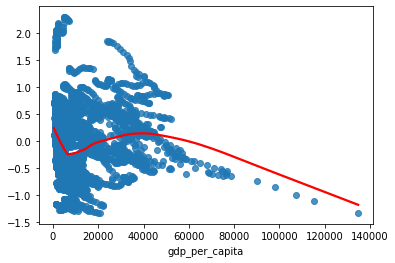

In [249]:
sns.regplot(gdp['gdp_per_capita'],depression_resid,lowess=True,line_kws={'color':'red'})

In [250]:
Y = mental['Alcohol use disorders (%)']
X = gdp['gdp_per_capita']
X = sm.add_constant(X)

In [251]:
model_alc = sm.OLS(Y,X).fit()

In [252]:
model_alc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Alcohol use disorders (%)   R-squared:                       0.001
Model:                                   OLS   Adj. R-squared:                  0.000
Method:                        Least Squares   F-statistic:                     2.053
Date:                       Sat, 07 May 2022   Prob (F-statistic):              0.152
Time:                               14:06:53   Log-Likelihood:                -3945.6
No. Observations:                       2926   AIC:                             7895.
Df Residuals:                           2924   BIC:                             7907.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.6076      0.023     69.382      0.000       1.562       1.653
gdp_per_capita -1.791e-06   1.25e-06     -1.433      0.152   -4.24e-06     6.6e-07
==============================================================================
Omnibus:                     1182.326   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4840.810
Skew:                           1.980   Prob(JB):                         0.00
Kurtosis:                       7.902   Cond. No.                     2.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [253]:
resid_alc = model_alc.resid

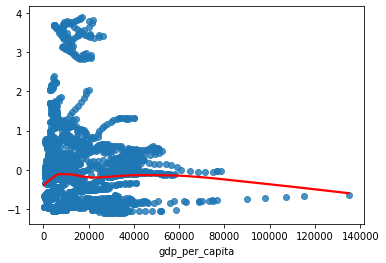

In [254]:
sns.regplot(gdp['gdp_per_capita'],resid_alc,lowess=True,line_kws={'color':'red'})

In [255]:
mental.columns

Index(['Entity', 'Code', 'Year', 'Schizophrenia (%)', 'Bipolar disorder (%)',
       'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)',
       'Alcohol use disorders (%)'],
      dtype='object')

In [256]:
gdp.head(20)

,Entity,Year,gdp_per_capita
0,Afghanistan,1992,843.875305
1,Afghanistan,1993,578.402710
2,Afghanistan,1994,428.424591
3,Afghanistan,1995,632.940430
4,Afghanistan,1996,600.175293
5,Afghanistan,1997,570.598083
6,Afghanistan,1998,545.038818
7,Afghanistan,1999,518.657898
8,Afghanistan,2000,502.372711
9,Afghanistan,2001,489.682007


In [257]:
mental.head(20)

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
1,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
2,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
3,Afghanistan,AFG,1995,0.160076,0.698695,0.090980,4.828337,1.728112,4.104207,0.668746
4,Afghanistan,AFG,1996,0.160249,0.698914,0.089709,4.828083,1.737643,4.107500,0.667727
5,Afghanistan,AFG,1997,0.160554,0.699127,0.088372,4.827726,1.746891,4.110834,0.666220
6,Afghanistan,AFG,1998,0.160931,0.699372,0.087330,4.826971,1.756963,4.114438,0.664676
7,Afghanistan,AFG,1999,0.161311,0.699674,0.086267,4.826413,1.770791,4.117633,0.663428
8,Afghanistan,AFG,2000,0.161621,0.700015,0.086021,4.827047,1.788395,4.118610,0.662479
9,Afghanistan,AFG,2001,0.161957,0.700499,0.086517,4.831409,1.839123,4.121381,0.661158


In [258]:
len(methane['Country'].unique())

154

In [215]:
methane_new = methane[methane['Sector']=='Total including LUCF']
methane_new = methane_new.T
# methane_newwww = methane.drop(labels=[['Sector'],['Gas'],['Unit']])
# methane_newwww
methane_new = methane_new.drop(labels=['Sector'],axis=0,inplace=True)

In [216]:
methane

,Country,Sector,Gas,Unit,2010,2009,2008,2007,2006,2005,...,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992
0,China,Total including LUCF,CH4,MTCO2e,1064.20,1019.28,974.42,921.86,883.58,837.94,...,824.52,830.59,826.57,814.80,792.55,824.63,798.90,774.10,758.01,752.10
1,China,Total excluding LUCF,CH4,MTCO2e,1063.83,1018.91,973.58,921.56,883.36,837.67,...,824.17,829.61,825.69,813.83,791.73,823.86,798.45,773.65,757.56,751.66
2,Russia,Total including LUCF,CH4,MTCO2e,804.22,776.75,798.54,792.59,783.56,767.29,...,643.60,623.67,604.57,606.50,614.99,634.53,643.52,670.71,728.51,784.68
3,Russia,Total excluding LUCF,CH4,MTCO2e,801.36,774.47,793.09,791.13,780.69,765.48,...,642.04,617.06,598.70,597.72,610.38,622.22,639.73,666.92,724.72,780.89
4,China,Energy,CH4,MTCO2e,593.65,552.07,510.49,468.91,427.33,385.75,...,330.67,316.90,303.13,289.36,275.59,261.82,248.05,234.28,229.86,225.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,Uzbekistan,Land-Use Change and Forestry,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.04,0.02,0.03,0.03,0.03,0.03,0.03,0.03,0.03
1728,Vietnam,Industrial Processes,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1735,Yemen,Industrial Processes,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1736,Yemen,Land-Use Change and Forestry,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


methane

In [217]:
methane_new = methane[methane['Sector']=='Total including LUCF']
methane_new = methane_new.drop(columns='Sector')
methane_new = methane_new.drop(columns='Gas')
methane_new = methane_new.drop(columns='Unit')
methane_new = methane_new.sort_values(by='Country')
methane_new = methane_new.T
methane_new = methane_new.rename(columns=methane_new.iloc[0])
methane_new = methane_new.drop(methane_new.index[0])
methane_new = methane_new.reset_index()
methane_new = methane_new.sort_values(by='index')
methane_new = methane_new.reset_index()
methane_new = methane_new.drop(columns='level_0')
methane_new = methane_new.rename(columns={'index':'Year'})
methane_new

,Year,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Ukraine,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1992,8.99,3.51,22.59,28.47,108.14,3.17,157.41,11.32,14.83,...,173.63,130.76,769.59,20.05,68.93,64.9,46.88,3.53,21.33,9.86
1,1993,8.89,3.57,22.89,28.78,107.63,2.94,154.07,10.99,14.28,...,164.34,129.28,752.41,20.74,100.97,66.44,48.09,3.62,21.13,8.33
2,1994,8.96,4.14,22.94,29.18,109.1,2.77,152.9,10.61,13.8,...,155.09,122.3,759.44,20.93,85.45,69.13,48.98,3.64,20.9,9
3,1995,9.14,4.12,25.72,29.46,109.5,2.61,151.43,10.12,13.51,...,143.87,124.1,746.77,20.82,87.47,71.27,51.73,3.73,20.72,9.29
4,1996,9.93,3.96,28.51,33.64,109.41,2.46,146.29,9.89,14.32,...,138.74,122.84,740.53,21.09,89.5,72.59,54.69,4.16,18.33,10.67
5,1997,10.6,3.77,31.24,32.42,110.18,2.3,150.49,9.59,15.21,...,132.69,120.74,723.75,20.8,80.05,74.43,56.85,4.61,18.26,10.83
6,1998,11.1,3.63,34.23,37.89,108.17,2.1,151.02,9.31,16.09,...,126.4,117.13,704.8,20.33,75.79,77.65,60.88,5.08,18.8,11.45
7,1999,11.87,3.7,37.2,36.09,112.17,1.95,163.9,9.17,16.94,...,127.56,111.72,690.45,20.49,81.65,77.94,63.53,5.49,18.16,11.73
8,2000,10.59,3.79,40.16,32.92,111.46,1.83,169.83,8.94,17.8,...,117.9,107.46,680.81,20.11,94.68,80.17,65.53,5.92,15.59,11.39
9,2001,9.36,3.69,41.65,28.14,109.59,1.88,176.75,8.8,19.2,...,113.17,104.03,672.66,20.1,98.09,78.37,65.84,6.16,17.24,11.5


In [72]:
# mental['Schizophrenia (%)']
gdp.head(5)

,Entity,Year,gdp_per_capita
0,Afghanistan,1992,843.875305
1,Afghanistan,1993,578.402710
2,Afghanistan,1994,428.424591
3,Afghanistan,1995,632.940430
4,Afghanistan,1996,600.175293


In [73]:
mental.head(5)

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
1,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
2,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
3,Afghanistan,AFG,1995,0.160076,0.698695,0.090980,4.828337,1.728112,4.104207,0.668746
4,Afghanistan,AFG,1996,0.160249,0.698914,0.089709,4.828083,1.737643,4.107500,0.667727


In [218]:
high = ['Australia' ,'Austria' ,'Bahrain' ,'Barbados' ,'Belgium' ,'Canada' ,'Croatia', 'Chile',
        'Cyprus','Denmark','Equatorial Guinea','Estonia','Finland','France','Germany',
        'Greece','Iceland' ,'Ireland' ,'Israel' ,'Italy' ,'Japan' ,'Kuwait' ,'Latvia','Lithuania' ,'Luxembourg' ,
        'Malta','Netherlands','New Zealand' ,'Norway','North Korea', 'Oman' ,'Poland' ,'Portugal' ,'Qatar',
        'Russia','Saudi Arabia','Singapore','Slovakia','Slovenia','South Korea', 'Spain',
        'Sweden','Switzerland','Trinidad and Tobago','United Kingdom', 'United States','Uruguay']

upper_middle = ['Albania', 'Algeria', 'Angola', 'Argentina', 'Azerbaijan' ,'Belarus', 'Bosnia and Herzegovina',
                'Botswana', 'Brazil', 'Bulgaria', 'China', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic',
                'Ecuador', 'Gabon', 'Hungary','Iran','Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Lebanon', 'Libya', 
                'Malaysia', 'Mauritius', 'Mexico', 'Montenegro','Namibia', 'Panama', 'Peru', 'Romania', 'Serbia', 
                'South Africa', 'Thailand', 'Tunisia', 'Turkey', 'Turkmenistan', 'Venezuela', 'Saint Lucia']

lower_middle = ['Armenia', 'Bolivia', 'Cameroon', 'Cape Verde', 'Djibouti', 'Egypt','El Salvador', 'Georgia', 
                'Ghana','Guatemala', 'Honduras', 'India', 'Indonesia', 'Lesotho', 'Mauritania','Moldova','Morocco', 
                'Nicaragua','Nigeria', 'Pakistan', 'Paraguay', 'Philippines','Sao Tome and Principe', 'Senegal', 
                'Sri Lanka', 'Syria', 'Ukraine', 'Uzbekistan', 'Vietnam', 'Yemen', 'Zambia', 'Cambodia', 'Dominica', 
                'Laos', 'Mongolia', 'Seychelles']

low = ['Bangladesh','Benin','Burkina Faso','Burundi','Central African Republic','Chad','Comoros','Ethiopia','Gambia',
      'Guinea','Guinea-Bissau','Haiti','Kenya','Kyrgyzstan','Liberia','Madagascar','Malawi','Mali','Mozambique',
       'Myanmar','Nepal','Niger','Rwanda','Sierra Leone','Tajikistan','Tanzania','Togo','Uganda','Zimbabwe', 'Afghanistan']

In [219]:
gdp_high = gdp[gdp['Entity'].isin(high)].groupby(by='Year').mean()
gdp_up = gdp[gdp['Entity'].isin(upper_middle)].groupby(by='Year').mean()
gdp_lower_middle = gdp[gdp['Entity'].isin(lower_middle)].groupby(by='Year').mean()
gdp_low = gdp[gdp['Entity'].isin(low)].groupby(by='Year').mean()

In [220]:
gdp_high = gdp_high.reset_index()

In [221]:
gdp_lower_middle = gdp_lower_middle.reset_index()

In [222]:
gdp_low = gdp_low.reset_index()

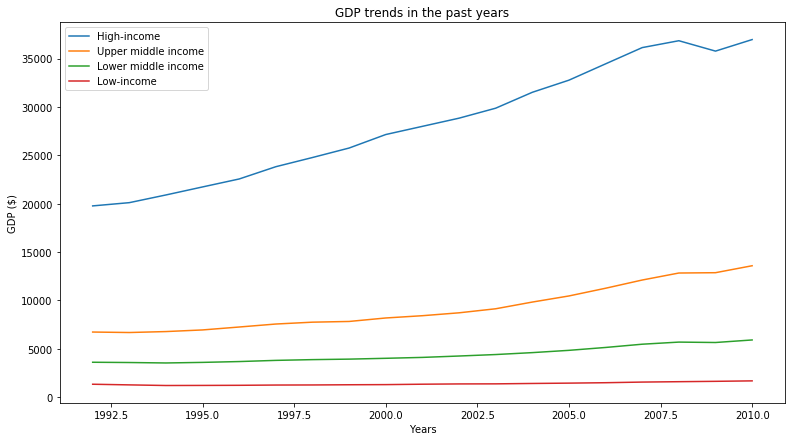

In [223]:
plt.figure(figsize = (13,7))
plt.xlabel('Years')
plt.ylabel('GDP ($)')
plt.title('GDP trends in the past years')
plt.plot(gdp_high['Year'],gdp_high['gdp_per_capita'],label='High-income')
plt.plot(gdp_upper_middle['Year'],gdp_upper_middle['gdp_per_capita'],label='Upper middle income')
plt.plot(gdp_lower_middle['Year'],gdp_lower_middle['gdp_per_capita'], label='Lower middle income')
plt.plot(gdp_low['Year'],gdp_low['gdp_per_capita'], label='Low-income')
plt.legend()
plt.show()

In [224]:
# linear regression,  checking assumptions, logistic regression
# forecasting (holt-winters – seasonality)
# 2008 – economic crisis
# simple exponential smoothing – 
# tableau and sqlite 

In [467]:
methane.head(5)

,Country,Sector,Gas,Unit,2010,2009,2008,2007,2006,2005,...,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992
0,China,Total including LUCF,CH4,MTCO2e,1064.20,1019.28,974.42,921.86,883.58,837.94,...,824.52,830.59,826.57,814.80,792.55,824.63,798.90,774.10,758.01,752.10
1,China,Total excluding LUCF,CH4,MTCO2e,1063.83,1018.91,973.58,921.56,883.36,837.67,...,824.17,829.61,825.69,813.83,791.73,823.86,798.45,773.65,757.56,751.66
2,Russia,Total including LUCF,CH4,MTCO2e,804.22,776.75,798.54,792.59,783.56,767.29,...,643.60,623.67,604.57,606.50,614.99,634.53,643.52,670.71,728.51,784.68
3,Russia,Total excluding LUCF,CH4,MTCO2e,801.36,774.47,793.09,791.13,780.69,765.48,...,642.04,617.06,598.70,597.72,610.38,622.22,639.73,666.92,724.72,780.89
4,China,Energy,CH4,MTCO2e,593.65,552.07,510.49,468.91,427.33,385.75,...,330.67,316.90,303.13,289.36,275.59,261.82,248.05,234.28,229.86,225.44


# iterrows pandas function

In [225]:
methane[methane['Country']=='China'] # group by country and average everything out. 

,Country,Sector,Gas,Unit,2010,2009,2008,2007,2006,2005,...,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992
0,China,Total including LUCF,CH4,MTCO2e,1064.20,1019.28,974.42,921.86,883.58,837.94,...,824.52,830.59,826.57,814.80,792.55,824.63,798.90,774.10,758.01,752.10
1,China,Total excluding LUCF,CH4,MTCO2e,1063.83,1018.91,973.58,921.56,883.36,837.67,...,824.17,829.61,825.69,813.83,791.73,823.86,798.45,773.65,757.56,751.66
4,China,Energy,CH4,MTCO2e,593.65,552.07,510.49,468.91,427.33,385.75,...,330.67,316.90,303.13,289.36,275.59,261.82,248.05,234.28,229.86,225.44
5,China,Fugitive Emissions,CH4,MTCO2e,539.68,497.44,455.21,412.97,370.74,328.50,...,274.72,261.27,247.83,234.38,220.94,207.49,194.05,180.60,174.68,168.76
19,China,Agriculture,CH4,MTCO2e,346.06,348.44,350.41,345.70,354.81,356.42,...,362.55,372.89,373.88,366.92,349.74,386.77,366.27,346.38,338.76,341.33
26,China,Waste,CH4,MTCO2e,124.13,118.40,112.68,106.95,101.23,95.50,...,130.95,139.82,148.68,157.55,166.41,175.27,184.14,193.00,188.95,184.89
114,China,Other Fuel Combustion,CH4,MTCO2e,53.97,54.63,55.28,55.94,56.59,57.25,...,55.95,55.63,55.30,54.98,54.65,54.33,54.00,53.68,55.18,56.68
1014,China,Land-Use Change and Forestry,CH4,MTCO2e,0.37,0.36,0.84,0.30,0.21,0.27,...,0.34,0.99,0.88,0.97,0.82,0.77,0.44,0.44,0.44,0.44
1405,China,Industrial Processes,CH4,MTCO2e,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [226]:
mental_high = mental[mental['Entity'].isin(high)].groupby(by='Year').mean().reset_index()
mental_upper_middle = mental[mental['Entity'].isin(upper_middle)].groupby(by='Year').mean().reset_index()
mental_lower_middle = mental[mental['Entity'].isin(lower_middle)].groupby(by='Year').mean().reset_index()
mental_lower = mental[mental['Entity'].isin(low)].groupby(by='Year').mean().reset_index()

# HIGH 

In [579]:
Y = mental_high['Schizophrenia (%)']
X = gdp_high.iloc[:,1:]
X = sm.add_constant(X)

In [580]:
model_high = sm.OLS(Y,X).fit()

In [581]:
model_high.summary()

/Users/WeirdCesar/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Schizophrenia (%)   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     408.9
Date:                Mon, 09 May 2022   Prob (F-statistic):           2.50e-13
Time:                        16:42:59   Log-Likelihood:                 131.14
No. Observations:                  19   AIC:                            -258.3
Df Residuals:                      17   BIC:                            -256.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2397      0.000    820.404      0.000       0.239       0.240
gdp_per_capita  2.045e-07   1.01e-08     20.220      0.000    1.83e-07    2.26e-07
==============================================================================
Omnibus:                        2.935   Durbin-Watson:                   0.392
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.246
Skew:                           0.820   Prob(JB):                        0.325
Kurtosis:                       2.619   Cond. No.                     1.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [582]:
Y = mental_high['Bipolar disorder (%)']
X = gdp_high.iloc[:,1:]
X = sm.add_constant(X)

In [583]:
model_high_bp = sm.OLS(Y,X).fit()

In [584]:
model_high_bp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Bipolar disorder (%)   R-squared:                       0.728
Model:                              OLS   Adj. R-squared:                  0.712
Method:                   Least Squares   F-statistic:                     45.49
Date:                  Mon, 09 May 2022   Prob (F-statistic):           3.43e-06
Time:                          16:48:14   Log-Likelihood:                 120.14
No. Observations:                    19   AIC:                            -236.3
Df Residuals:                        17   BIC:                            -234.4
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.8394      0.001   1610.425      0.000       0.838       0.840
gdp_per_capita  1.217e-07    1.8e-08      6.744      0.000    8.36e-08     1.6e-07
==============================================================================
Omnibus:                        0.127   Durbin-Watson:                   0.207
Prob(Omnibus):                  0.938   Jarque-Bera (JB):                0.263
Skew:                          -0.161   Prob(JB):                        0.877
Kurtosis:                       2.522   Cond. No.                     1.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [585]:
mental_high

,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,1992,0.244061,0.840794,0.379512,4.879340,1.028227,3.837600,1.671556
1,1993,0.244118,0.841236,0.381656,4.885399,1.034132,3.837384,1.679356
2,1994,0.244180,0.841632,0.383819,4.890369,1.039724,3.836807,1.685904
3,1995,0.244240,0.841954,0.386138,4.893493,1.044697,3.835374,1.691056
4,1996,0.244323,0.842231,0.389031,4.894588,1.051667,3.831520,1.695192
5,1997,0.244451,0.842519,0.392737,4.894682,1.062067,3.823441,1.698747
6,1998,0.244607,0.842814,0.396889,4.894478,1.073380,3.813712,1.701564
7,1999,0.244776,0.843099,0.401045,4.894605,1.083395,3.803981,1.703608
8,2000,0.244944,0.843349,0.404834,4.895118,1.090001,3.796282,1.704927
9,2001,0.245163,0.843436,0.408540,4.894725,1.093090,3.787910,1.703734


In [589]:
Y = mental_high['Eating disorders (%)']
X = gdp_high.iloc[:,1:]
X = sm.add_constant(X)

In [590]:
model_high_ed = sm.OLS(Y,X).fit()

In [591]:
model_high_ed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Eating disorders (%)   R-squared:                       0.991
Model:                              OLS   Adj. R-squared:                  0.991
Method:                   Least Squares   F-statistic:                     1887.
Date:                  Mon, 09 May 2022   Prob (F-statistic):           7.30e-19
Time:                          19:55:14   Log-Likelihood:                 92.058
No. Observations:                    19   AIC:                            -180.1
Df Residuals:                        17   BIC:                            -178.2
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3120      0.002    136.521      0.000       0.307       0.317
gdp_per_capita  3.437e-06   7.91e-08     43.443      0.000    3.27e-06     3.6e-06
==============================================================================
Omnibus:                        0.991   Durbin-Watson:                   1.081
Prob(Omnibus):                  0.609   Jarque-Bera (JB):                0.122
Skew:                          -0.120   Prob(JB):                        0.941
Kurtosis:                       3.311   Cond. No.                     1.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [599]:
Y1 = mental_high['Anxiety disorders (%)']
X1 = gdp_high.iloc[:,1:]
X1 = sm.add_constant(X1)

In [600]:
model_high_anxiety = sm.OLS(Y1,X1).fit()

In [601]:
model_high_anxiety.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Anxiety disorders (%)   R-squared:                       0.016
Model:                               OLS   Adj. R-squared:                 -0.042
Method:                    Least Squares   F-statistic:                    0.2759
Date:                   Mon, 09 May 2022   Prob (F-statistic):              0.606
Time:                           19:57:31   Log-Likelihood:                 79.486
No. Observations:                     19   AIC:                            -155.0
Df Residuals:                         17   BIC:                            -153.1
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.8890      0.004   1103.679      0.000       4.880       4.898
gdp_per_capita  8.054e-08   1.53e-07      0.525      0.606   -2.43e-07    4.04e-07
==============================================================================
Omnibus:                       11.587   Durbin-Watson:                   0.313
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.081
Skew:                          -1.327   Prob(JB):                       0.0107
Kurtosis:                       5.103   Cond. No.                     1.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [606]:
Y1 = mental_high['Drug use disorders (%)']
X1 = gdp_high.iloc[:,1:]
X1 = sm.add_constant(X1)

In [607]:
model_high_drug = sm.OLS(Y1,X1).fit()

In [609]:
model_high_drug.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Drug use disorders (%)   R-squared:                       0.813
Model:                                OLS   Adj. R-squared:                  0.802
Method:                     Least Squares   F-statistic:                     74.12
Date:                    Mon, 09 May 2022   Prob (F-statistic):           1.32e-07
Time:                            19:59:26   Log-Likelihood:                 59.249
No. Observations:                      19   AIC:                            -114.5
Df Residuals:                          17   BIC:                            -112.6
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9692      0.013     75.416      0.000       0.942       0.996
gdp_per_capita   3.83e-06   4.45e-07      8.609      0.000    2.89e-06    4.77e-06
==============================================================================
Omnibus:                        4.094   Durbin-Watson:                   0.160
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                1.639
Skew:                           0.322   Prob(JB):                        0.441
Kurtosis:                       1.714   Cond. No.                     1.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [610]:
Y1 = mental_high['Depression (%)']
X1 = gdp_high.iloc[:,1:]
X1 = sm.add_constant(X1)

In [611]:
model_high_depre = sm.OLS(Y1,X1).fit()

In [612]:
model_high_depre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Depression (%)   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     863.8
Date:                Mon, 09 May 2022   Prob (F-statistic):           5.15e-16
Time:                        20:00:06   Log-Likelihood:                 68.251
No. Observations:                  19   AIC:                            -132.5
Df Residuals:                      17   BIC:                            -130.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.0102      0.008    501.183      0.000       3.993       4.027
gdp_per_capita  -8.14e-06   2.77e-07    -29.390      0.000   -8.72e-06   -7.56e-06
==============================================================================
Omnibus:                        3.400   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                2.716
Skew:                          -0.892   Prob(JB):                        0.257
Kurtosis:                       2.504   Cond. No.                     1.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [616]:
Y1 = mental_high['Alcohol use disorders (%)']
X1 = gdp_high.iloc[:,1:]
X1 = sm.add_constant(X1)

In [617]:
model_high_alc = sm.OLS(Y1,X1).fit()

In [618]:
model_high_alc.summary()

/Users/WeirdCesar/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Alcohol use disorders (%)   R-squared:                       0.535
Model:                                   OLS   Adj. R-squared:                  0.507
Method:                        Least Squares   F-statistic:                     19.53
Date:                       Mon, 09 May 2022   Prob (F-statistic):           0.000376
Time:                               20:04:19   Log-Likelihood:                 59.951
No. Observations:                         19   AIC:                            -115.9
Df Residuals:                             17   BIC:                            -114.0
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.6463      0.012    132.930      0.000       1.620       1.672
gdp_per_capita  1.894e-06   4.29e-07      4.419      0.000     9.9e-07     2.8e-06
==============================================================================
Omnibus:                        0.899   Durbin-Watson:                   0.296
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.747
Skew:                          -0.151   Prob(JB):                        0.688
Kurtosis:                       2.076   Cond. No.                     1.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# mental_upper_middle

In [629]:
Y1 = mental_upper_middle['Schizophrenia (%)']
X1 = gdp_upper_middle.iloc[:,2:]
X1 = sm.add_constant(X1)

In [630]:
model_uppmid_schi = sm.OLS(Y1,X1).fit()

In [631]:
model_uppmid_schi.summary()

/Users/WeirdCesar/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Schizophrenia (%)   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1964.
Date:                Mon, 09 May 2022   Prob (F-statistic):           5.21e-19
Time:                        20:10:58   Log-Likelihood:                 141.42
No. Observations:                  19   AIC:                            -278.8
Df Residuals:                      17   BIC:                            -276.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1942      0.000   1341.740      0.000       0.194       0.195
gdp_per_capita  6.769e-07   1.53e-08     44.322      0.000    6.45e-07    7.09e-07
==============================================================================
Omnibus:                        0.361   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.835   Jarque-Bera (JB):                0.503
Skew:                           0.113   Prob(JB):                        0.778
Kurtosis:                       2.236   Cond. No.                     3.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [637]:
Y1 = mental_upper_middle['Bipolar disorder (%)']
X1 = gdp_upper_middle.iloc[:,2:]
X1 = sm.add_constant(X1)

In [638]:
model_uppmid_bp = sm.OLS(Y1,X1).fit()

In [639]:
model_uppmid_bp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Bipolar disorder (%)   R-squared:                       0.967
Model:                              OLS   Adj. R-squared:                  0.965
Method:                   Least Squares   F-statistic:                     495.4
Date:                  Mon, 09 May 2022   Prob (F-statistic):           5.17e-14
Time:                          20:12:18   Log-Likelihood:                 120.19
No. Observations:                    19   AIC:                            -236.4
Df Residuals:                        17   BIC:                            -234.5
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7346      0.000   1660.527      0.000       0.734       0.735
gdp_per_capita  1.039e-06   4.67e-08     22.258      0.000     9.4e-07    1.14e-06
==============================================================================
Omnibus:                        0.097   Durbin-Watson:                   0.339
Prob(Omnibus):                  0.952   Jarque-Bera (JB):                0.241
Skew:                          -0.141   Prob(JB):                        0.887
Kurtosis:                       2.526   Cond. No.                     3.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [640]:
Y1 = mental_upper_middle['Eating disorders (%)']
X1 = gdp_upper_middle.iloc[:,2:]
X1 = sm.add_constant(X1)

In [641]:
model_uppmid_ed = sm.OLS(Y1,X1).fit()

In [642]:
model_uppmid_ed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Eating disorders (%)   R-squared:                       0.989
Model:                              OLS   Adj. R-squared:                  0.989
Method:                   Least Squares   F-statistic:                     1577.
Date:                  Mon, 09 May 2022   Prob (F-statistic):           3.31e-18
Time:                          20:12:56   Log-Likelihood:                 106.00
No. Observations:                    19   AIC:                            -208.0
Df Residuals:                        17   BIC:                            -206.1
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1688      0.001    180.734      0.000       0.167       0.171
gdp_per_capita  3.912e-06   9.85e-08     39.711      0.000     3.7e-06    4.12e-06
==============================================================================
Omnibus:                        0.037   Durbin-Watson:                   0.823
Prob(Omnibus):                  0.982   Jarque-Bera (JB):                0.242
Skew:                           0.062   Prob(JB):                        0.886
Kurtosis:                       2.461   Cond. No.                     3.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [643]:
Y1 = mental_upper_middle['Anxiety disorders (%)']
X1 = gdp_upper_middle.iloc[:,2:]
X1 = sm.add_constant(X1)

In [644]:
model_uppmid_anxiety = sm.OLS(Y1,X1).fit()

In [645]:
model_uppmid_anxiety.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Anxiety disorders (%)   R-squared:                       0.819
Model:                               OLS   Adj. R-squared:                  0.808
Method:                    Least Squares   F-statistic:                     76.86
Date:                   Mon, 09 May 2022   Prob (F-statistic):           1.03e-07
Time:                           20:14:05   Log-Likelihood:                 58.441
No. Observations:                     19   AIC:                            -112.9
Df Residuals:                         17   BIC:                            -111.0
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.8243      0.011    335.163      0.000       3.800       3.848
gdp_per_capita  1.055e-05    1.2e-06      8.767      0.000    8.01e-06    1.31e-05
==============================================================================
Omnibus:                        9.103   Durbin-Watson:                   0.147
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                2.043
Skew:                           0.207   Prob(JB):                        0.360
Kurtosis:                       1.448   Cond. No.                     3.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [646]:
Y1 = mental_upper_middle['Drug use disorders (%)']
X1 = gdp_upper_middle.iloc[:,2:]
X1 = sm.add_constant(X1)

In [647]:
model_uppmid_drug = sm.OLS(Y1,X1).fit()

In [648]:
model_uppmid_drug.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Drug use disorders (%)   R-squared:                       0.911
Model:                                OLS   Adj. R-squared:                  0.906
Method:                     Least Squares   F-statistic:                     174.6
Date:                    Mon, 09 May 2022   Prob (F-statistic):           2.28e-10
Time:                            20:14:54   Log-Likelihood:                 66.432
No. Observations:                      19   AIC:                            -128.9
Df Residuals:                          17   BIC:                            -127.0
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7936      0.007    105.924      0.000       0.778       0.809
gdp_per_capita  1.044e-05    7.9e-07     13.213      0.000    8.78e-06    1.21e-05
==============================================================================
Omnibus:                        0.894   Durbin-Watson:                   0.196
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.752
Skew:                          -0.436   Prob(JB):                        0.687
Kurtosis:                       2.564   Cond. No.                     3.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [649]:
Y1 = mental_upper_middle['Depression (%)']
X1 = gdp_upper_middle.iloc[:,2:]
X1 = sm.add_constant(X1)

In [650]:
model_uppmid_depre = sm.OLS(Y1,X1).fit()

In [651]:
model_uppmid_depre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Depression (%)   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     15.61
Date:                Mon, 09 May 2022   Prob (F-statistic):            0.00103
Time:                        20:16:11   Log-Likelihood:                 56.523
No. Observations:                  19   AIC:                            -109.0
Df Residuals:                      17   BIC:                            -107.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.3062      0.013    261.940      0.000       3.280       3.333
gdp_per_capita -5.261e-06   1.33e-06     -3.951      0.001   -8.07e-06   -2.45e-06
==============================================================================
Omnibus:                        2.758   Durbin-Watson:                   0.169
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                1.497
Skew:                          -0.387   Prob(JB):                        0.473
Kurtosis:                       1.864   Cond. No.                     3.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [652]:
Y1 = mental_upper_middle['Alcohol use disorders (%)']
X1 = gdp_upper_middle.iloc[:,2:]
X1 = sm.add_constant(X1)

In [653]:
model_uppmid_alc = sm.OLS(Y1,X1).fit()

In [655]:
model_uppmid_alc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Alcohol use disorders (%)   R-squared:                       0.849
Model:                                   OLS   Adj. R-squared:                  0.840
Method:                        Least Squares   F-statistic:                     95.59
Date:                       Mon, 09 May 2022   Prob (F-statistic):           2.15e-08
Time:                               20:17:30   Log-Likelihood:                 72.295
No. Observations:                         19   AIC:                            -140.6
Df Residuals:                             17   BIC:                            -138.7
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.5732      0.006    285.872      0.000       1.562       1.585
gdp_per_capita  5.676e-06   5.81e-07      9.777      0.000    4.45e-06     6.9e-06
==============================================================================
Omnibus:                        3.064   Durbin-Watson:                   0.355
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                1.699
Skew:                          -0.461   Prob(JB):                        0.428
Kurtosis:                       1.861   Cond. No.                     3.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# gdp_lower_middle

In [657]:
Y1 = mental_lower_middle['Schizophrenia (%)']
X1 = gdp_lower_middle.iloc[:,2:]
X1 = sm.add_constant(X1)

In [658]:
model_lowermid_schiz = sm.OLS(Y1,X1).fit()

In [659]:
model_lowermid_schiz.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Schizophrenia (%)   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1450.
Date:                Mon, 09 May 2022   Prob (F-statistic):           6.69e-18
Time:                        20:24:37   Log-Likelihood:                 139.61
No. Observations:                  19   AIC:                            -275.2
Df Residuals:                      17   BIC:                            -273.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1848      0.000    858.899      0.000       0.184       0.185
gdp_per_capita   1.83e-06    4.8e-08     38.084      0.000    1.73e-06    1.93e-06
==============================================================================
Omnibus:                        1.283   Durbin-Watson:                   1.058
Prob(Omnibus):                  0.526   Jarque-Bera (JB):                0.842
Skew:                          -0.076   Prob(JB):                        0.656
Kurtosis:                       1.980   Cond. No.                     2.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [660]:
Y1 = mental_lower_middle['Bipolar disorder (%)']
X1 = gdp_lower_middle.iloc[:,2:]
X1 = sm.add_constant(X1)

In [661]:
model_lowermid_bp = sm.OLS(Y1,X1).fit()

In [662]:
model_lowermid_bp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Bipolar disorder (%)   R-squared:                       0.962
Model:                              OLS   Adj. R-squared:                  0.959
Method:                   Least Squares   F-statistic:                     427.1
Date:                  Mon, 09 May 2022   Prob (F-statistic):           1.75e-13
Time:                          20:25:42   Log-Likelihood:                 121.99
No. Observations:                    19   AIC:                            -240.0
Df Residuals:                        17   BIC:                            -238.1
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6638      0.001   1220.505      0.000       0.663       0.665
gdp_per_capita   2.51e-06   1.21e-07     20.667      0.000    2.25e-06    2.77e-06
==============================================================================
Omnibus:                        0.722   Durbin-Watson:                   0.376
Prob(Omnibus):                  0.697   Jarque-Bera (JB):                0.593
Skew:                          -0.387   Prob(JB):                        0.743
Kurtosis:                       2.614   Cond. No.                     2.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [663]:
Y1 = mental_lower_middle['Eating disorders (%)']
X1 = gdp_lower_middle.iloc[:,2:]
X1 = sm.add_constant(X1)

In [664]:
model_lowermid_ed = sm.OLS(Y1,X1).fit()

In [665]:
model_lowermid_ed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Eating disorders (%)   R-squared:                       0.979
Model:                              OLS   Adj. R-squared:                  0.978
Method:                   Least Squares   F-statistic:                     809.9
Date:                  Mon, 09 May 2022   Prob (F-statistic):           8.81e-16
Time:                          20:27:04   Log-Likelihood:                 108.83
No. Observations:                    19   AIC:                            -213.7
Df Residuals:                        17   BIC:                            -211.8
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1147      0.001    105.558      0.000       0.112       0.117
gdp_per_capita  6.907e-06   2.43e-07     28.459      0.000    6.39e-06    7.42e-06
==============================================================================
Omnibus:                        1.669   Durbin-Watson:                   0.601
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.413
Skew:                           0.585   Prob(JB):                        0.493
Kurtosis:                       2.356   Cond. No.                     2.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [669]:
Y1 = mental_lower_middle['Anxiety disorders (%)']
X1 = gdp_lower_middle.iloc[:,2:]
X1 = sm.add_constant(X1)

In [670]:
model_lowermid_anxi = sm.OLS(Y1,X1).fit()

In [671]:
model_lowermid_anxi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Anxiety disorders (%)   R-squared:                       0.948
Model:                               OLS   Adj. R-squared:                  0.945
Method:                    Least Squares   F-statistic:                     309.6
Date:                   Mon, 09 May 2022   Prob (F-statistic):           2.40e-12
Time:                           20:29:56   Log-Likelihood:                 93.993
No. Observations:                     19   AIC:                            -184.0
Df Residuals:                         17   BIC:                            -182.1
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.3387      0.002   1406.816      0.000       3.334       3.344
gdp_per_capita  9.327e-06    5.3e-07     17.595      0.000    8.21e-06    1.04e-05
==============================================================================
Omnibus:                        3.069   Durbin-Watson:                   0.422
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                2.144
Skew:                           0.654   Prob(JB):                        0.342
Kurtosis:                       2.001   Cond. No.                     2.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [673]:
Y1 = mental_lower_middle['Drug use disorders (%)']
X1 = gdp_lower_middle.iloc[:,2:]
X1 = sm.add_constant(X1)

In [674]:
model_lowermid_drug = sm.OLS(Y1,X1).fit()

In [676]:
model_lowermid_drug.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Drug use disorders (%)   R-squared:                       0.886
Model:                                OLS   Adj. R-squared:                  0.880
Method:                     Least Squares   F-statistic:                     132.7
Date:                    Mon, 09 May 2022   Prob (F-statistic):           1.88e-09
Time:                            20:31:42   Log-Likelihood:                 76.494
No. Observations:                      19   AIC:                            -149.0
Df Residuals:                          17   BIC:                            -147.1
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5990      0.006    100.490      0.000       0.586       0.612
gdp_per_capita  1.534e-05   1.33e-06     11.518      0.000    1.25e-05    1.81e-05
==============================================================================
Omnibus:                        1.026   Durbin-Watson:                   0.278
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                0.946
Skew:                          -0.387   Prob(JB):                        0.623
Kurtosis:                       2.227   Cond. No.                     2.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [677]:
Y1 = mental_lower_middle['Depression (%)']
X1 = gdp_lower_middle.iloc[:,2:]
X1 = sm.add_constant(X1)

In [678]:
model_lowermid_depre = sm.OLS(Y1,X1).fit()

In [680]:
model_lowermid_depre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Depression (%)   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     3.714
Date:                Mon, 09 May 2022   Prob (F-statistic):             0.0708
Time:                        20:32:33   Log-Likelihood:                 61.547
No. Observations:                  19   AIC:                            -119.1
Df Residuals:                      17   BIC:                            -117.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.4247      0.013    261.599      0.000       3.397       3.452
gdp_per_capita -5.635e-06   2.92e-06     -1.927      0.071   -1.18e-05    5.34e-07
==============================================================================
Omnibus:                        4.018   Durbin-Watson:                   0.152
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                1.928
Skew:                          -0.480   Prob(JB):                        0.381
Kurtosis:                       1.769   Cond. No.                     2.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [681]:
Y1 = mental_lower_middle['Alcohol use disorders (%)']
X1 = gdp_lower_middle.iloc[:,2:]
X1 = sm.add_constant(X1)

In [682]:
model_lowermid_alc = sm.OLS(Y1,X1).fit()

In [683]:
model_lowermid_alc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Alcohol use disorders (%)   R-squared:                       0.004
Model:                                   OLS   Adj. R-squared:                 -0.055
Method:                        Least Squares   F-statistic:                   0.06793
Date:                       Mon, 09 May 2022   Prob (F-statistic):              0.798
Time:                               20:34:11   Log-Likelihood:                 67.947
No. Observations:                         19   AIC:                            -131.9
Df Residuals:                             17   BIC:                            -130.0
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.5894      0.009    170.036      0.000       1.570       1.609
gdp_per_capita -5.441e-07   2.09e-06     -0.261      0.798   -4.95e-06    3.86e-06
==============================================================================
Omnibus:                        0.954   Durbin-Watson:                   0.245
Prob(Omnibus):                  0.621   Jarque-Bera (JB):                0.907
Skew:                          -0.409   Prob(JB):                        0.635
Kurtosis:                       2.309   Cond. No.                     2.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# low

In [ ]:
gdp_low
mental_lower 

In [687]:
Y1 = mental_lower['Schizophrenia (%)']
X1 = gdp_low.iloc[:,1:]
X1 = sm.add_constant(X1)

In [688]:
model_low_schiz = sm.OLS(Y1,X1).fit()

In [689]:
model_low_schiz.summary()

/Users/WeirdCesar/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Schizophrenia (%)   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     62.09
Date:                Mon, 09 May 2022   Prob (F-statistic):           4.48e-07
Time:                        20:37:33   Log-Likelihood:                 129.69
No. Observations:                  19   AIC:                            -255.4
Df Residuals:                      17   BIC:                            -253.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1645      0.001    269.768      0.000       0.163       0.166
gdp_per_capita   3.45e-06   4.38e-07      7.880      0.000    2.53e-06    4.37e-06
==============================================================================
Omnibus:                        0.616   Durbin-Watson:                   0.225
Prob(Omnibus):                  0.735   Jarque-Bera (JB):                0.648
Skew:                          -0.187   Prob(JB):                        0.723
Kurtosis:                       2.177   Cond. No.                     1.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [690]:
Y1 = mental_lower['Bipolar disorder (%)']
X1 = gdp_low.iloc[:,1:]
X1 = sm.add_constant(X1)

In [691]:
model_low_bp = sm.OLS(Y1,X1).fit()

In [692]:
model_low_bp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Bipolar disorder (%)   R-squared:                       0.929
Model:                              OLS   Adj. R-squared:                  0.925
Method:                   Least Squares   F-statistic:                     224.1
Date:                  Mon, 09 May 2022   Prob (F-statistic):           3.20e-11
Time:                          20:38:16   Log-Likelihood:                 127.87
No. Observations:                    19   AIC:                            -251.7
Df Residuals:                        17   BIC:                            -249.9
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6156      0.001    917.637      0.000       0.614       0.617
gdp_per_capita   7.21e-06   4.82e-07     14.969      0.000    6.19e-06    8.23e-06
==============================================================================
Omnibus:                       27.548   Durbin-Watson:                   0.495
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.411
Skew:                          -2.407   Prob(JB):                     2.27e-10
Kurtosis:                       8.738   Cond. No.                     1.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [693]:
Y1 = mental_lower['Eating disorders (%)']
X1 = gdp_low.iloc[:,1:]
X1 = sm.add_constant(X1)

In [694]:
model_low_ed = sm.OLS(Y1,X1).fit()

In [695]:
model_low_ed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Eating disorders (%)   R-squared:                       0.693
Model:                              OLS   Adj. R-squared:                  0.675
Method:                   Least Squares   F-statistic:                     38.31
Date:                  Mon, 09 May 2022   Prob (F-statistic):           9.89e-06
Time:                          20:39:07   Log-Likelihood:                 107.53
No. Observations:                    19   AIC:                            -211.1
Df Residuals:                        17   BIC:                            -209.2
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0922      0.002     47.123      0.000       0.088       0.096
gdp_per_capita  8.696e-06    1.4e-06      6.190      0.000    5.73e-06    1.17e-05
==============================================================================
Omnibus:                        2.314   Durbin-Watson:                   0.135
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                1.333
Skew:                           0.348   Prob(JB):                        0.513
Kurtosis:                       1.904   Cond. No.                     1.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [702]:
Y1 = mental_lower['Anxiety disorders (%)']
X1 = gdp_low.iloc[:,1:]
X1 = sm.add_constant(X1)

In [703]:
model_low_anxiety = sm.OLS(Y1,X1).fit()

In [704]:
model_low_anxiety.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Anxiety disorders (%)   R-squared:                       0.797
Model:                               OLS   Adj. R-squared:                  0.785
Method:                    Least Squares   F-statistic:                     66.70
Date:                   Mon, 09 May 2022   Prob (F-statistic):           2.75e-07
Time:                           20:42:39   Log-Likelihood:                 87.273
No. Observations:                     19   AIC:                            -170.5
Df Residuals:                         17   BIC:                            -168.7
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.2740      0.006    576.036      0.000       3.262       3.286
gdp_per_capita  3.333e-05   4.08e-06      8.167      0.000    2.47e-05    4.19e-05
==============================================================================
Omnibus:                       16.308   Durbin-Watson:                   0.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.411
Skew:                          -1.731   Prob(JB):                     0.000450
Kurtosis:                       5.734   Cond. No.                     1.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [705]:
Y1 = mental_lower['Drug use disorders (%)']
X1 = gdp_low.iloc[:,1:]
X1 = sm.add_constant(X1)

In [706]:
model_low_drug = sm.OLS(Y1,X1).fit()

In [707]:
model_low_drug.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Drug use disorders (%)   R-squared:                       0.925
Model:                                OLS   Adj. R-squared:                  0.920
Method:                     Least Squares   F-statistic:                     209.1
Date:                    Mon, 09 May 2022   Prob (F-statistic):           5.54e-11
Time:                            20:43:07   Log-Likelihood:                 79.408
No. Observations:                      19   AIC:                            -154.8
Df Residuals:                          17   BIC:                            -152.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4210      0.009     48.963      0.000       0.403       0.439
gdp_per_capita  8.926e-05   6.17e-06     14.459      0.000    7.62e-05       0.000
==============================================================================
Omnibus:                       28.966   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.162
Skew:                          -2.490   Prob(JB):                     1.28e-11
Kurtosis:                       9.210   Cond. No.                     1.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [709]:
Y1 = mental_lower['Depression (%)']
X1 = gdp_low.iloc[:,1:]
X1 = sm.add_constant(X1)

In [710]:
model_low_depres = sm.OLS(Y1,X1).fit()

In [711]:
model_low_depres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Depression (%)   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     9.220
Date:                Mon, 09 May 2022   Prob (F-statistic):            0.00745
Time:                        20:44:34   Log-Likelihood:                 60.467
No. Observations:                  19   AIC:                            -116.9
Df Residuals:                      17   BIC:                            -115.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.7048      0.023    159.003      0.000       3.656       3.754
gdp_per_capita  -5.08e-05   1.67e-05     -3.037      0.007   -8.61e-05   -1.55e-05
==============================================================================
Omnibus:                        8.261   Durbin-Watson:                   0.140
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                1.865
Skew:                          -0.066   Prob(JB):                        0.394
Kurtosis:                       1.471   Cond. No.                     1.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [712]:
Y1 = mental_lower['Alcohol use disorders (%)']
X1 = gdp_low.iloc[:,1:]
X1 = sm.add_constant(X1)

In [713]:
model_low_alc = sm.OLS(Y1,X1).fit()

In [715]:
model_low_alc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Alcohol use disorders (%)   R-squared:                       0.202
Model:                                   OLS   Adj. R-squared:                  0.156
Method:                        Least Squares   F-statistic:                     4.316
Date:                       Fri, 13 May 2022   Prob (F-statistic):             0.0532
Time:                               11:04:44   Log-Likelihood:                 72.117
No. Observations:                         19   AIC:                            -140.2
Df Residuals:                             17   BIC:                            -138.3
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3232      0.013    104.845      0.000       1.297       1.350
gdp_per_capita  1.882e-05   9.06e-06      2.078      0.053   -2.93e-07    3.79e-05
==============================================================================
Omnibus:                        1.304   Durbin-Watson:                   0.228
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                0.907
Skew:                          -0.199   Prob(JB):                        0.635
Kurtosis:                       2.006   Cond. No.                     1.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# HIGHEST MENTAL HEALTH DISORDERS

### High 
1) eating disorder
2) depression

### Upper-middle
1) schizophrenia
2) eating disorder

### lower-middle
1) schizophrenia
2) eating disorder

### low
1) bipolar disorder
2) drug use


# LOWEST MENTAL HEALTH DISORDERS

### High 
1) Anxiety
2) Alcohol

### Upper-middle
1) Depression
2) Anxiety

### lower-middle
1) Alcohol
2) Depression

### low
1) Depression
2) Alcohol


In [716]:
final_lr_high = {'High':[0.991,0.980], 'upper_middle':[0.991,0.989],'lower_middle':[0.988,0.978],'low':[0.925,0.920]}

In [718]:
final_lr_high1= {'High':['Eating Disorder','Depression'], 'upper_middle':['Schizophrenia','Eating Disorder'], 'lower_middle':['Schizophrenia','Eating Disorder'],'low':['Bipolar Disorder','Drug Use']}

In [717]:
final_high = pd.DataFrame(final_lr_high)

In [721]:
final_high1 =pd.DataFrame(final_lr_high1)

TypeError: only size-1 arrays can be converted to Python scalars

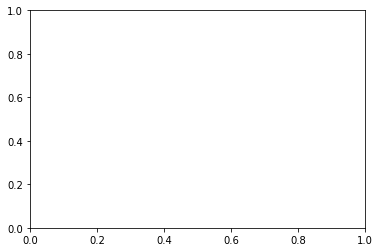

In [724]:
plt.bar(final_high, final_high.values)

In [723]:
final_high

,High,upper_middle,lower_middle,low
0,0.991,0.991,0.988,0.925
1,0.980,0.989,0.978,0.920


In [730]:
result

,High,upper_middle,lower_middle,low,High,upper_middle,lower_middle,low
0,0.991,0.991,0.988,0.925,Eating Disorder,Schizophrenia,Schizophrenia,Bipolar Disorder
1,0.980,0.989,0.978,0.920,Depression,Eating Disorder,Eating Disorder,Drug Use


In [227]:
methane_grouped = methane.groupby(by=["Country"]).mean()
methane_grouped

,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,11.780000,9.918889,8.500000,6.811111,5.407778,4.002222,3.932222,3.944444,3.850000,3.241111,3.654444,4.088889,3.836667,3.676667,3.460000,3.202222,3.166667,3.167778,3.224444
Albania,1.056667,1.055556,1.095556,1.152222,1.196667,1.215556,1.217778,1.245556,1.232222,1.247778,1.275556,1.250000,1.226667,1.273333,1.335556,1.391111,1.406667,1.225556,1.216667
Algeria,19.464444,19.498889,19.533333,19.695556,19.776667,19.860000,19.123333,18.335556,17.558889,16.886667,16.204444,15.013333,13.797778,12.575556,11.436667,10.281111,9.130000,9.104444,8.994444
Angola,16.155556,15.232222,14.463333,14.100000,13.131111,13.063333,12.603333,12.040000,10.823333,9.936667,10.762222,11.367778,11.833333,10.410000,10.645556,9.814444,9.681111,9.504444,9.365556
Argentina,38.202222,40.844444,42.460000,42.824444,42.583333,41.890000,41.836667,41.414444,39.253333,38.154444,38.621111,38.657778,37.444444,38.096667,37.833333,37.968889,37.772222,37.214444,37.317778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,27.133333,28.691111,28.826667,28.895556,28.865556,29.023333,29.426667,30.107778,30.424444,31.128889,31.801111,30.970000,30.590000,29.543333,28.822222,28.280000,27.367778,26.273333,25.563333
Vietnam,31.084444,30.320000,29.534444,28.848889,27.997778,26.975556,26.066667,25.008889,24.192222,23.110000,22.823333,22.095556,21.074444,19.777778,18.975556,17.921111,16.935556,16.600000,16.158889
Yemen,2.818889,2.768889,2.706667,2.630000,2.547778,2.486667,2.440000,2.392222,2.233333,2.187778,2.104444,1.938889,1.780000,1.600000,1.427778,1.262222,1.231111,1.223333,1.191111


In [228]:
methane_grouped = methane.groupby(by=["Country"]).mean()


countries = []
years = []

lol = methane_grouped.index.tolist()
heh = methane_grouped.columns.tolist()
heh.reverse()

for things in lol:
    for nums in range(19):
        countries.append(things)
        
for nums in range(154):
    for things in heh:
        years.append(things)

methane_grouped = methane_grouped.reset_index()
methane_grouped = methane_grouped.to_numpy()
methane_list = methane_grouped.tolist()

numbers = []

for rows in methane_list:
    rows.reverse()

for rows in methane_list:
    for items in rows:
        if type(items) == float :
            numbers.append(items)
            
            
new = pd.DataFrame(years, countries)
new = new.reset_index()
new.rename(columns = {0:'Year', 'index':'Country'}, inplace = True)
new['Average'] = numbers
new.head(20)

,Country,Year,Average
0,Afghanistan,1992,3.224444
1,Afghanistan,1993,3.167778
2,Afghanistan,1994,3.166667
3,Afghanistan,1995,3.202222
4,Afghanistan,1996,3.460000
5,Afghanistan,1997,3.676667
6,Afghanistan,1998,3.836667
7,Afghanistan,1999,4.088889
8,Afghanistan,2000,3.654444
9,Afghanistan,2001,3.241111


In [429]:
new_high = new[new['Country'].isin(high)].groupby(by='Year').mean()
new_upper = new[new['Country'].isin(upper_middle)].groupby(by='Year').mean()
new_lower = new[new['Country'].isin(lower_middle)].groupby(by='Year').mean()
new_low = new[new['Country'].isin(low)].groupby(by='Year').mean()

In [257]:
ins1 = SimpleExpSmoothing(new_high).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(3).rename('alpha=0.2')

/Users/WeirdCesar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [258]:
ins2 = SimpleExpSmoothing(new_high).fit(smoothing_level=0.8,optimized=False)
ins_cast2 = ins2.forecast(3).rename('alpha=0.8')

/Users/WeirdCesar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [259]:
ins3 = SimpleExpSmoothing(new_high).fit()
ins_cast3 = ins3.forecast(3).rename('alpha=%s'%ins3.model.params['smoothing_level'])

/Users/WeirdCesar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


/Users/WeirdCesar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/WeirdCesar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/WeirdCesar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


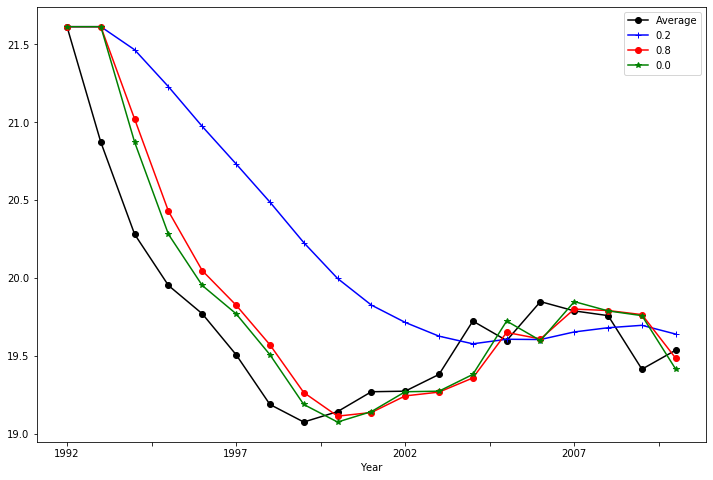

In [269]:
ax = new_high.plot(marker='o', color='black', figsize=(12,8), legend=True)

ins1 = SimpleExpSmoothing(new_high).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(3).rename('alpha=0.2')
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue', label="0.2")
ins2 = SimpleExpSmoothing(new_high).fit(smoothing_level=0.8,optimized=False)
ins_cast2 = ins2.forecast(3).rename('alpha=0.8')
ins3 = SimpleExpSmoothing(new_high).fit()
ins_cast3 = ins3.forecast(3).rename('alpha=%s'%ins3.model.params['smoothing_level'])
ins2.fittedvalues.plot(marker='o', ax=ax, color='red',label='0.8')
ins3.fittedvalues.plot(marker='*', ax=ax, color='green',label='0.0')
plt.legend()
plt.show()

In [270]:
# mental_high, mental_upper_middle, mental_lower_middle, mental_lower

In [271]:
from statsmodels.tsa.api import VAR

In [283]:
new_high

,Average
Year,
1992,21.612766
1993,20.871773
1994,20.281229
1995,19.952908
1996,19.771513
1997,19.509078
1998,19.189882
1999,19.077187
2000,19.144043


In [334]:
mental_high

,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,1992,0.244061,0.840794,0.379512,4.879340,1.028227,3.837600,1.671556
1,1993,0.244118,0.841236,0.381656,4.885399,1.034132,3.837384,1.679356
2,1994,0.244180,0.841632,0.383819,4.890369,1.039724,3.836807,1.685904
3,1995,0.244240,0.841954,0.386138,4.893493,1.044697,3.835374,1.691056
4,1996,0.244323,0.842231,0.389031,4.894588,1.051667,3.831520,1.695192
5,1997,0.244451,0.842519,0.392737,4.894682,1.062067,3.823441,1.698747
6,1998,0.244607,0.842814,0.396889,4.894478,1.073380,3.813712,1.701564
7,1999,0.244776,0.843099,0.401045,4.894605,1.083395,3.803981,1.703608
8,2000,0.244944,0.843349,0.404834,4.895118,1.090001,3.796282,1.704927
9,2001,0.245163,0.843436,0.408540,4.894725,1.093090,3.787910,1.703734


In [335]:
mental_high.to_csv("mental_high.csv")

In [285]:
gdp_high

,Year,gdp_per_capita
0,1992,19767.870418
1,1993,20103.269581
2,1994,20899.039483
3,1995,21728.079891
4,1996,22551.221365
5,1997,23819.245515
6,1998,24768.395014
7,1999,25748.251758
8,2000,27143.763524
9,2001,27989.053238


In [286]:
new_high.merge(mental_high, on='Year')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [293]:
new_high1 = new_high.reset_index()

In [294]:
new_high1

,Year,Average
0,1992,21.612766
1,1993,20.871773
2,1994,20.281229
3,1995,19.952908
4,1996,19.771513
5,1997,19.509078
6,1998,19.189882
7,1999,19.077187
8,2000,19.144043
9,2001,19.271418


In [295]:
mental_high1 = mental_high.reset_index()

In [336]:
mental_high1

,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,1992,0.244061,0.840794,0.379512,4.879340,1.028227,3.837600,1.671556
1,1993,0.244118,0.841236,0.381656,4.885399,1.034132,3.837384,1.679356
2,1994,0.244180,0.841632,0.383819,4.890369,1.039724,3.836807,1.685904
3,1995,0.244240,0.841954,0.386138,4.893493,1.044697,3.835374,1.691056
4,1996,0.244323,0.842231,0.389031,4.894588,1.051667,3.831520,1.695192
5,1997,0.244451,0.842519,0.392737,4.894682,1.062067,3.823441,1.698747
6,1998,0.244607,0.842814,0.396889,4.894478,1.073380,3.813712,1.701564
7,1999,0.244776,0.843099,0.401045,4.894605,1.083395,3.803981,1.703608
8,2000,0.244944,0.843349,0.404834,4.895118,1.090001,3.796282,1.704927
9,2001,0.245163,0.843436,0.408540,4.894725,1.093090,3.787910,1.703734


In [299]:
mental_high1=mental_high1.drop(columns='index')

In [303]:
mental_high1['Year'] = mental_high['Year'].astype(int)
new_high1['Year'] = new_high1['Year'].astype(int)

In [337]:
v = new_high1.merge(mental_high1, how='inner', on='Year')

In [340]:
v

,Year,Average,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,1992,21.612766,0.244061,0.840794,0.379512,4.879340,1.028227,3.837600,1.671556
1,1993,20.871773,0.244118,0.841236,0.381656,4.885399,1.034132,3.837384,1.679356
2,1994,20.281229,0.244180,0.841632,0.383819,4.890369,1.039724,3.836807,1.685904
3,1995,19.952908,0.244240,0.841954,0.386138,4.893493,1.044697,3.835374,1.691056
4,1996,19.771513,0.244323,0.842231,0.389031,4.894588,1.051667,3.831520,1.695192
5,1997,19.509078,0.244451,0.842519,0.392737,4.894682,1.062067,3.823441,1.698747
6,1998,19.189882,0.244607,0.842814,0.396889,4.894478,1.073380,3.813712,1.701564
7,1999,19.077187,0.244776,0.843099,0.401045,4.894605,1.083395,3.803981,1.703608
8,2000,19.144043,0.244944,0.843349,0.404834,4.895118,1.090001,3.796282,1.704927
9,2001,19.271418,0.245163,0.843436,0.408540,4.894725,1.093090,3.787910,1.703734


In [390]:
# 'Drug use disorders (%)'

In [397]:
 v1 = v[['Average','Schizophrenia (%)','Bipolar disorder (%)','Eating disorders (%)','Anxiety disorders (%)']]#,'Depression (%)']]#,'Alcohol use disorders (%)'] ]

In [398]:
v1

,Average,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%)
0,21.612766,0.244061,0.840794,0.379512,4.879340
1,20.871773,0.244118,0.841236,0.381656,4.885399
2,20.281229,0.244180,0.841632,0.383819,4.890369
3,19.952908,0.244240,0.841954,0.386138,4.893493
4,19.771513,0.244323,0.842231,0.389031,4.894588
5,19.509078,0.244451,0.842519,0.392737,4.894682
6,19.189882,0.244607,0.842814,0.396889,4.894478
7,19.077187,0.244776,0.843099,0.401045,4.894605
8,19.144043,0.244944,0.843349,0.404834,4.895118
9,19.271418,0.245163,0.843436,0.408540,4.894725


In [318]:
ad_fuller_result_1 = adfuller(v1['Average'].diff()[1:])

print('realgdp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(v1['Schizophrenia (%)'].diff()[1:])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realgdp
ADF Statistic: -2.6553888972336557
p-value: 0.08208113432887532

---------------------

realcons
ADF Statistic: -1.044800633867289
p-value: 0.736575796097571


In [319]:
print('rgnp causes ulc?\n')
print('------------------')
granger_1 = grangercausalitytests(v1[['Average', 'Schizophrenia (%)']], 4)

print('\nulc causes rgnp?\n')
print('------------------')
granger_2 = grangercausalitytests(v1[['Average', 'Schizophrenia (%)']], 4)

rgnp causes ulc?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6807  , p=0.1224  , df_denom=15, df_num=1
ssr based chi2 test:   chi2=3.2168  , p=0.0729  , df=1
likelihood ratio test: chi2=2.9596  , p=0.0854  , df=1
parameter F test:         F=2.6807  , p=0.1224  , df_denom=15, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7059  , p=0.5130  , df_denom=12, df_num=2
ssr based chi2 test:   chi2=2.0001  , p=0.3679  , df=2
likelihood ratio test: chi2=1.8909  , p=0.3885  , df=2
parameter F test:         F=0.7059  , p=0.5130  , df_denom=12, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5663  , p=0.6509  , df_denom=9, df_num=3
ssr based chi2 test:   chi2=3.0202  , p=0.3885  , df=3
likelihood ratio test: chi2=2.7666  , p=0.4290  , df=3
parameter F test:         F=0.5663  , p=0.6509  , df_denom=9, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:  

In [320]:
v1

,Average,Schizophrenia (%)
0,21.612766,0.244061
1,20.871773,0.244118
2,20.281229,0.244180
3,19.952908,0.244240
4,19.771513,0.244323
5,19.509078,0.244451
6,19.189882,0.244607
7,19.077187,0.244776
8,19.144043,0.244944
9,19.271418,0.245163


In [321]:
train = v1[:9]
test = v1[-9:]

In [363]:
v1[~v1.isin([np.nan, np.inf, -np.inf]).any(1)]

,Average,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,21.612766,0.244061,0.840794,0.379512,4.879340,1.028227,3.837600,1.671556
1,20.871773,0.244118,0.841236,0.381656,4.885399,1.034132,3.837384,1.679356
2,20.281229,0.244180,0.841632,0.383819,4.890369,1.039724,3.836807,1.685904
3,19.952908,0.244240,0.841954,0.386138,4.893493,1.044697,3.835374,1.691056
4,19.771513,0.244323,0.842231,0.389031,4.894588,1.051667,3.831520,1.695192
5,19.509078,0.244451,0.842519,0.392737,4.894682,1.062067,3.823441,1.698747
6,19.189882,0.244607,0.842814,0.396889,4.894478,1.073380,3.813712,1.701564
7,19.077187,0.244776,0.843099,0.401045,4.894605,1.083395,3.803981,1.703608
8,19.144043,0.244944,0.843349,0.404834,4.895118,1.090001,3.796282,1.704927
9,19.271418,0.245163,0.843436,0.408540,4.894725,1.093090,3.787910,1.703734


In [399]:
model = VAR(v1)

In [404]:
results = model.fit(2)

In [405]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 13, May, 2022
Time:                     16:44:03
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -86.5313
Nobs:                     17.0000    HQIC:                  -88.9590
Log likelihood:           692.820    FPE:                6.08276e-39
AIC:                     -89.2270    Det(Omega_mle):     5.01828e-40
--------------------------------------------------------------------
Results for equation Average
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                         1637.030671       400.969623            4.083           0.000
L1.Average                      -0.684259         0.277417           -2.467           0.014
L1.Schizophren

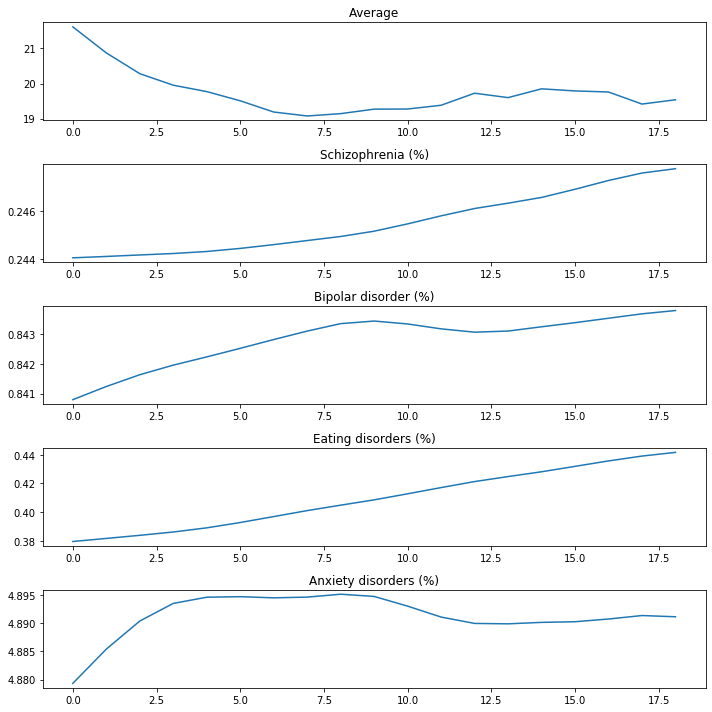

In [407]:
results.plot()
plt.tight_layout()

In [419]:
model.select_order(4)

In [421]:
results = model.fit(maxlags=4, ic='aic')

In [423]:
lag_order = results.k_ar

results.forecast(v1.values[-lag_order:], 5)

array([[20.36115462,  0.24803533,  0.84374222,  0.44584906,  4.88976105],
       [19.29907731,  0.24833649,  0.84366736,  0.44997505,  4.88836528],
       [19.87684949,  0.24862002,  0.8437666 ,  0.4539391 ,  4.88840898],
       [19.25127755,  0.24876155,  0.84399072,  0.45630296,  4.88947044],
       [21.06545891,  0.24894419,  0.84415869,  0.45925627,  4.88984311]])

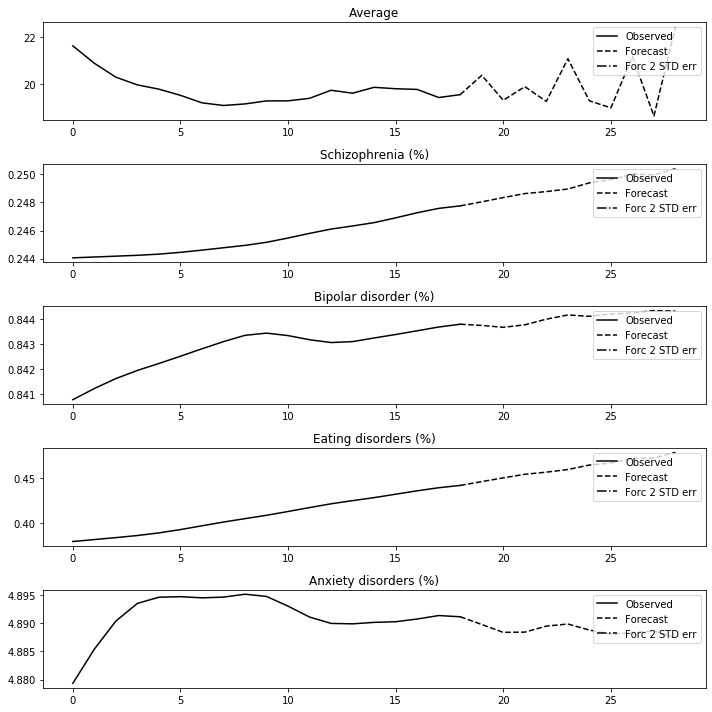

In [426]:
results.plot_forecast(10)
plt.tight_layout()

In [439]:
new_lower = new_lower.reset_index()

In [440]:
mental_lower['Year'] = mental_lower['Year'].astype(int)
new_lower['Year'] = new_lower['Year'].astype(int)

In [441]:
lower_merge= new_lower.merge(mental_lower, how='inner', on='Year')

In [442]:
lower_merge

,Year,Average,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,1992,16.674753,0.169261,0.624206,0.105305,3.311004,0.527142,3.624218,1.347596
1,1993,17.146512,0.169196,0.624285,0.104639,3.311680,0.529531,3.627001,1.350161
2,1994,17.052130,0.169136,0.624389,0.104054,3.313259,0.531376,3.630463,1.350558
3,1995,17.097006,0.169085,0.624490,0.103675,3.314616,0.532792,3.633285,1.350517
4,1996,16.954383,0.168994,0.624579,0.103288,3.315245,0.533812,3.636212,1.350970
5,1997,18.355062,0.168844,0.624682,0.102911,3.316145,0.534653,3.639431,1.350513
6,1998,17.193210,0.168689,0.624797,0.102542,3.317168,0.535535,3.642571,1.349508
7,1999,17.187809,0.168578,0.624919,0.102417,3.318158,0.536249,3.644824,1.348292
8,2000,17.109753,0.168563,0.625042,0.102405,3.318992,0.537021,3.645190,1.347160
9,2001,17.026235,0.168672,0.625216,0.102709,3.319873,0.538725,3.645041,1.345812


In [443]:
lower_methane= lower_merge.rename(index={0:1992,1:1993,2:1994,3:1995,4:1996,5:1997,6:1998,7:1999,8:2000,9:2001,10:2002,11:2003,12:2004,13:2005,14:2006,15:2007,16:2008, 17:2009,18:2010})
# high_methane = high_methane.set_index(high_methane['Average'])
# high_methane=high_methane.drop(columns='Average')
lower_methane = lower_methane.drop(columns='Year')
lower_methane

,Average,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
1992,16.674753,0.169261,0.624206,0.105305,3.311004,0.527142,3.624218,1.347596
1993,17.146512,0.169196,0.624285,0.104639,3.311680,0.529531,3.627001,1.350161
1994,17.052130,0.169136,0.624389,0.104054,3.313259,0.531376,3.630463,1.350558
1995,17.097006,0.169085,0.624490,0.103675,3.314616,0.532792,3.633285,1.350517
1996,16.954383,0.168994,0.624579,0.103288,3.315245,0.533812,3.636212,1.350970
1997,18.355062,0.168844,0.624682,0.102911,3.316145,0.534653,3.639431,1.350513
1998,17.193210,0.168689,0.624797,0.102542,3.317168,0.535535,3.642571,1.349508
1999,17.187809,0.168578,0.624919,0.102417,3.318158,0.536249,3.644824,1.348292
2000,17.109753,0.168563,0.625042,0.102405,3.318992,0.537021,3.645190,1.347160
2001,17.026235,0.168672,0.625216,0.102709,3.319873,0.538725,3.645041,1.345812


In [444]:
nobs = 4
df_train, df_test = lower_methane[0:-nobs], lower_methane[-nobs:]

In [445]:
df_differenced = df_train.diff().dropna()

In [446]:
model = VAR(df_differenced)
model_fitted = model.fit(4)
lag_order = model_fitted.k_ar
forecast_input = df_differenced.values[-lag_order:]
forecast_input

array([[-2.25709877e-01,  2.42476847e-04,  3.01324049e-04,
         5.16152934e-04,  1.31367664e-03,  3.88772906e-03,
         1.00196373e-03, -1.67561694e-03],
       [ 5.42962963e-01,  2.37662984e-04,  2.99240836e-04,
         5.00866305e-04,  1.31306747e-03,  4.01476822e-03,
         6.00020933e-05, -1.10280996e-03],
       [-2.32592593e-01,  1.80659104e-04,  2.38289382e-04,
         4.79131149e-04,  1.12341182e-03,  3.04740984e-03,
        -2.47284023e-03, -1.14308894e-04],
       [ 8.83888889e-01,  1.58813686e-04,  2.21455154e-04,
         4.68412571e-04,  7.51265093e-04,  3.29599127e-03,
        -6.14625273e-03,  2.71903748e-03]])

In [448]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=lower_methane.index[-nobs:], columns=lower_methane.columns + '_2d')
df_forecast

,Average_2d,Schizophrenia (%)_2d,Bipolar disorder (%)_2d,Eating disorders (%)_2d,Anxiety disorders (%)_2d,Drug use disorders (%)_2d,Depression (%)_2d,Alcohol use disorders (%)_2d
2007,1.363929,0.000160,0.000250,0.000406,0.000625,0.004373,-0.008506,0.005224
2008,2.148488,0.000157,0.000331,0.000376,0.000662,0.006373,-0.009486,0.008199
2009,2.950585,0.000086,0.000405,0.000104,0.000847,0.008249,-0.009207,0.010923
2010,3.277176,-0.000139,0.000386,-0.000376,0.000880,0.008497,-0.008976,0.014148


In [449]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [450]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['Average_2d', 'Schizophrenia (%)_2d', 'Bipolar disorder (%)_2d',
       'Eating disorders (%)_2d', 'Anxiety disorders (%)_2d',
       'Drug use disorders (%)_2d', 'Depression (%)_2d',
       'Alcohol use disorders (%)_2d']]

,Average_2d,Schizophrenia (%)_2d,Bipolar disorder (%)_2d,Eating disorders (%)_2d,Anxiety disorders (%)_2d,Drug use disorders (%)_2d,Depression (%)_2d,Alcohol use disorders (%)_2d
2007,1.363929,0.000160,0.000250,0.000406,0.000625,0.004373,-0.008506,0.005224
2008,2.148488,0.000157,0.000331,0.000376,0.000662,0.006373,-0.009486,0.008199
2009,2.950585,0.000086,0.000405,0.000104,0.000847,0.008249,-0.009207,0.010923
2010,3.277176,-0.000139,0.000386,-0.000376,0.000880,0.008497,-0.008976,0.014148


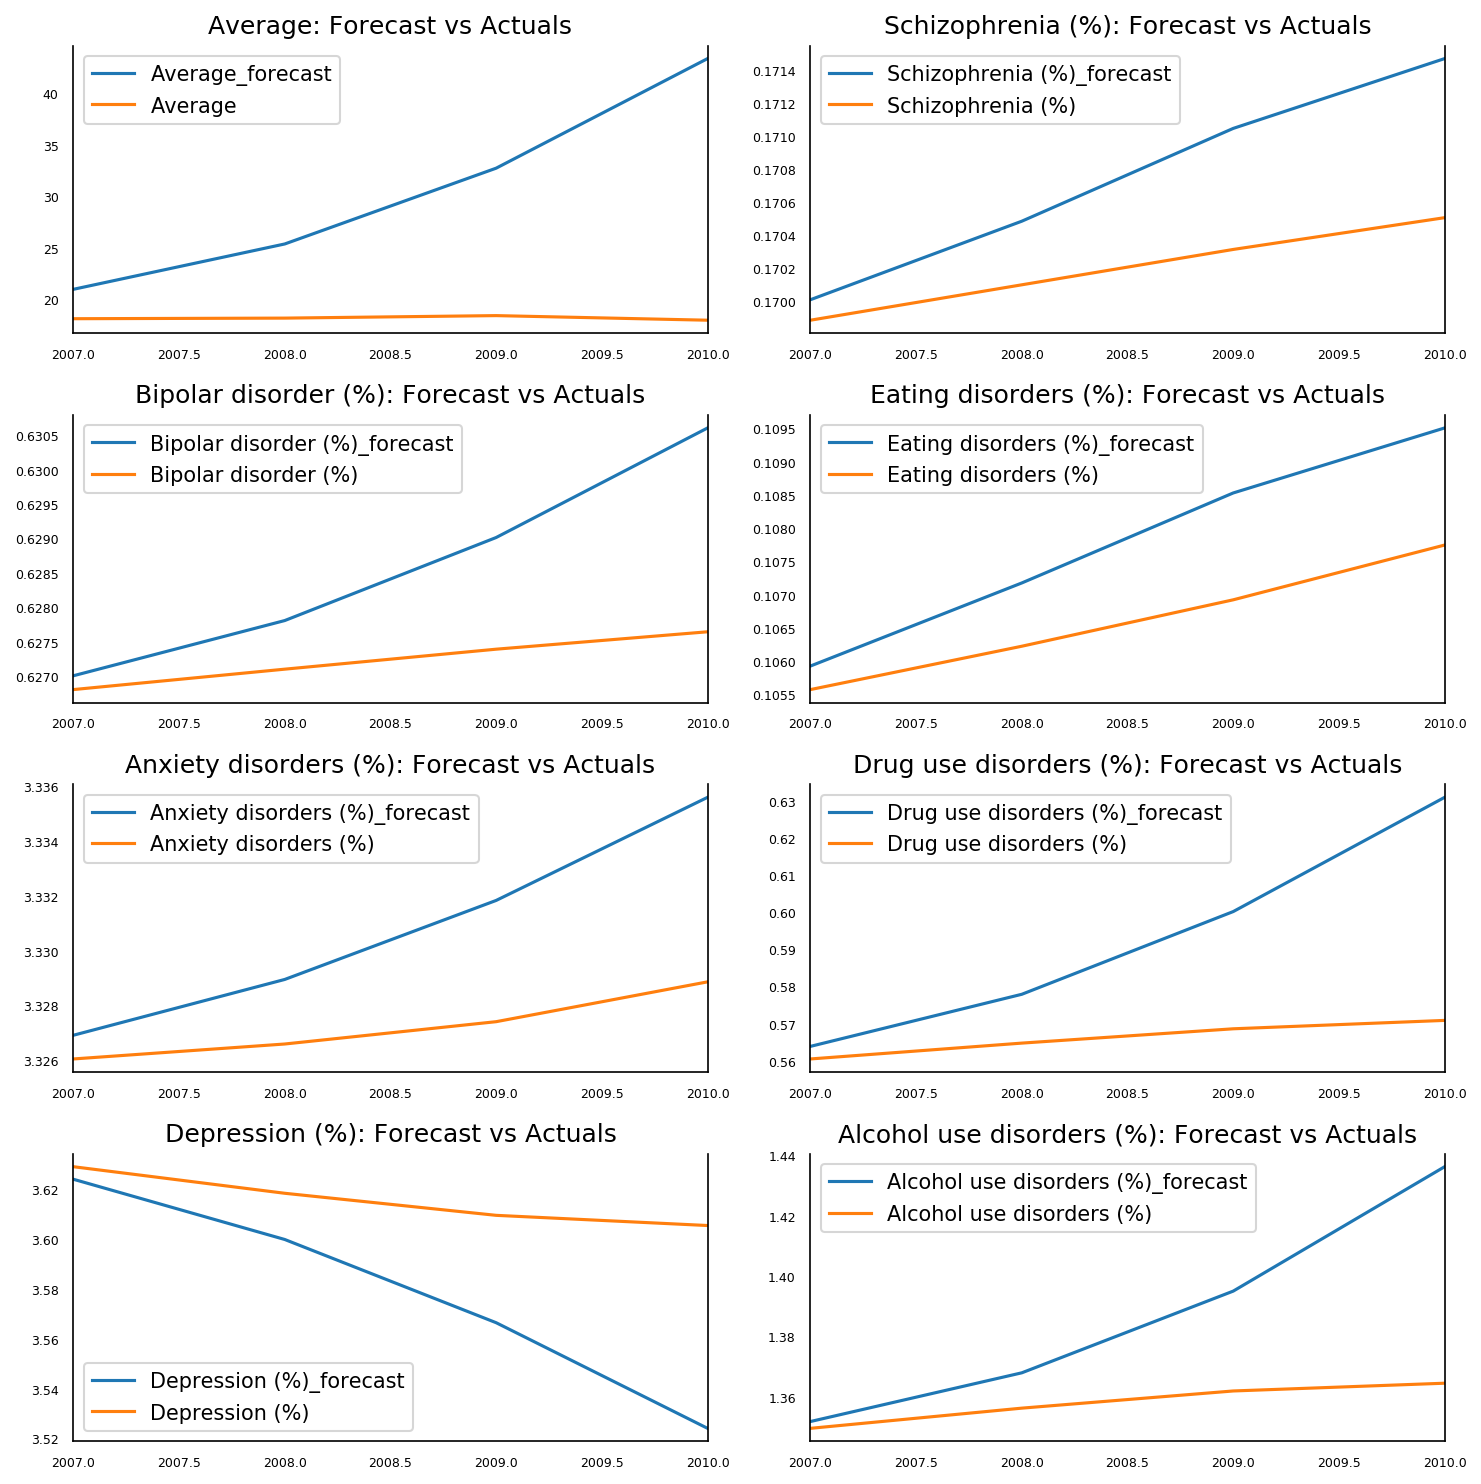

In [452]:
fig, axes = plt.subplots(nrows=int(len(lower_methane.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(lower_methane.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();
plt.savefig("low.png")

In [ ]:
mental_high = mental[mental['Entity'].isin(high)].groupby(by='Year').mean().reset_index()
mental_upper_middle = mental[mental['Entity'].isin(upper_middle)].groupby(by='Year').mean().reset_index()
mental_lower_middle = mental[mental['Entity'].isin(lower_middle)].groupby(by='Year').mean().reset_index()
mental_lower = mental[mental['Entity'].isin(low)].groupby(by='Year').mean().reset_index()